### 데이터 구성 <br>
#### data_raw 폴더 아래에
- {name}_OHLCV.csv
- {name} : JEPI, QQQ, SCHD, SPY, TLT, GLD
- 일별 데이터
- 첫 행 : Date, Close, High, Low, Open, Volume, Ticker
- 둘째 행 : , GLD, GLD, GLD, GLD, GLD

#### monthly_return 폴더 아래에
- {name}_monthly_return.csv
- {name} : JEPI, QQQ, SCHD, SPY, TLT, GLD
- 월별 리턴 (월간 수익률) 데이터
- 첫 행 : Date, Monthly Return

#### data_monthly 폴더 아래에
- {name}_monthly.csv
- {name} : JEPI, QQQ, SCHD, SPY, TLT, GLD
- 월별 가격 (월간 종가) 데이터
- 첫 행 : Date, Monthly Close

#### dividend_data 폴더 아래에
- {name}_dividends.csv
- {name} : JEPI, QQQ, SCHD, SPY, TLT 존재 (GLD는 없음)
- 배당 데이터
- 첫 행 : Date, Dividend

#### total_return 폴더 아래에
- {name}_total_return.csv
- {name} : JEPI, QQQ, SCHD, SPY, TLT, GLD
- 배당 재투자 반영한 누적 수익률 데이터
- 첫 행 : Date, Monthly Return, Monthly Close, Dividend Yield, Total Return, Cumulative Return

# 1. 데이터 로딩 및 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os

# seaborn 스타일 설정
sns.set_style('whitegrid')
sns.set_context('talk')

# 종목 리스트
tickers = ['JEPI', 'QQQ', 'SCHD', 'SPY', 'TLT', 'GLD']

# 폴더 경로
data_raw_path = './data_raw'
monthly_return_path = './monthly_return'
data_monthly_path = './data_monthly'
dividend_data_path = './dividend_data'
total_return_path = './total_return'

# 1) 일별 OHLCV 데이터 읽기
ohlcv_dfs = {}
for t in tickers:
    file = os.path.join(data_raw_path, f"{t}_OHLCV.csv")
    df = pd.read_csv(file, parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    ohlcv_dfs[t] = df

# 2) 월별 가격(종가) 데이터 읽기
monthly_close_dfs = {}
for t in tickers:
    file = os.path.join(data_monthly_path, f"{t}_monthly.csv")
    df = pd.read_csv(file, parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    monthly_close_dfs[t] = df

# 3) 월별 수익률 데이터 읽기
monthly_return_dfs = {}
for t in tickers:
    file = os.path.join(monthly_return_path, f"{t}_monthly_return.csv")
    df = pd.read_csv(file, parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    monthly_return_dfs[t] = df

# 4) 배당 데이터 (GLD 없음)
dividend_dfs = {}
for t in ['JEPI', 'QQQ', 'SCHD', 'SPY', 'TLT']:
    file = os.path.join(dividend_data_path, f"{t}_dividends.csv")
    df = pd.read_csv(file, parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    dividend_dfs[t] = df

# 5) 배당 재투자 누적 수익률 데이터
total_return_dfs = {}
for t in tickers:
    file = os.path.join(total_return_path, f"{t}_total_return.csv")
    df = pd.read_csv(file, parse_dates=['Date'])
    df.set_index('Date', inplace=True)
    total_return_dfs[t] = df

# 2. 개별 종목의 월별 수익률 합치기

In [2]:
# 개별 종목 월별 수익률 합치기
indiv_returns_df = pd.DataFrame({t: monthly_return_dfs[t]['Monthly Return'] for t in tickers})

# 3. 그래프 그리기

### 가능한 모든 조합 생성

In [3]:
from itertools import combinations

two_combinations = list(combinations(tickers, 2))

print(len(two_combinations))  # 15
print(two_combinations)

15
[('JEPI', 'QQQ'), ('JEPI', 'SCHD'), ('JEPI', 'SPY'), ('JEPI', 'TLT'), ('JEPI', 'GLD'), ('QQQ', 'SCHD'), ('QQQ', 'SPY'), ('QQQ', 'TLT'), ('QQQ', 'GLD'), ('SCHD', 'SPY'), ('SCHD', 'TLT'), ('SCHD', 'GLD'), ('SPY', 'TLT'), ('SPY', 'GLD'), ('TLT', 'GLD')]


15 <br>
[('JEPI', 'QQQ'), ('JEPI', 'SCHD'), ('JEPI', 'SPY'), ('JEPI', 'TLT'), ('JEPI', 'GLD'), ('QQQ', 'SCHD'), ('QQQ', 'SPY'), ('QQQ', 'TLT'), ('QQQ', 'GLD'), ('SCHD', 'SPY'), ('SCHD', 'TLT'), ('SCHD', 'GLD'), ('SPY', 'TLT'), ('SPY', 'GLD'), ('TLT', 'GLD')]

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 윈도우 기본 한글 폰트 경로 예시
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트

font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

## 선그래프 비율별
- ex) SCHD, QQQ, S9:Q1, S8:Q2, ...

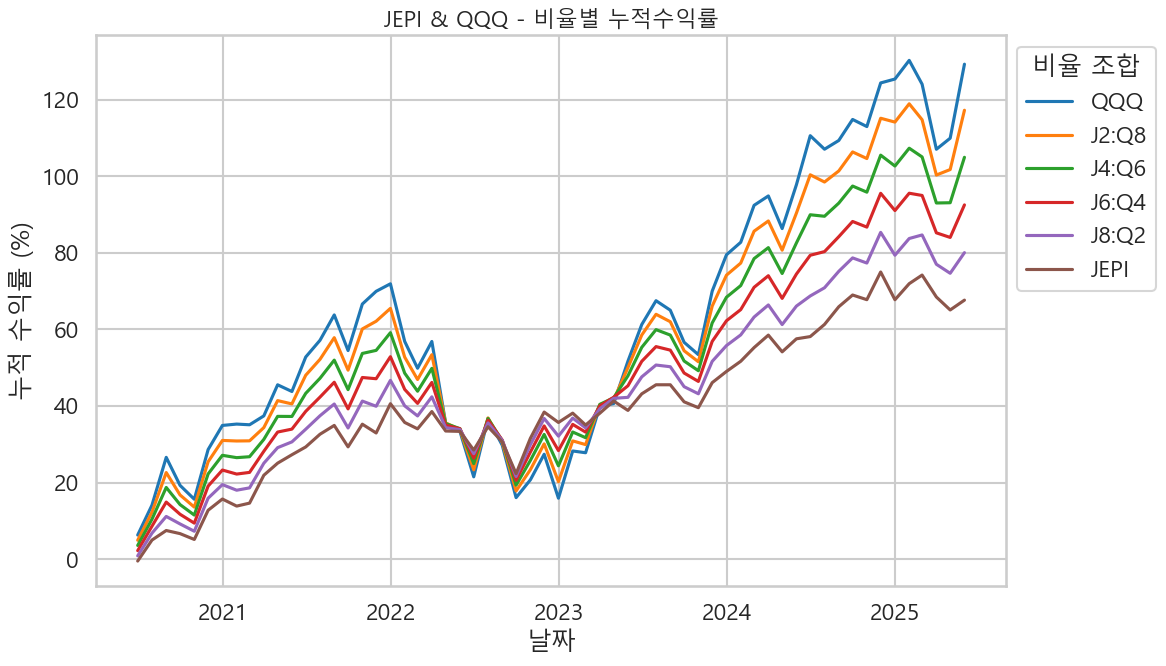

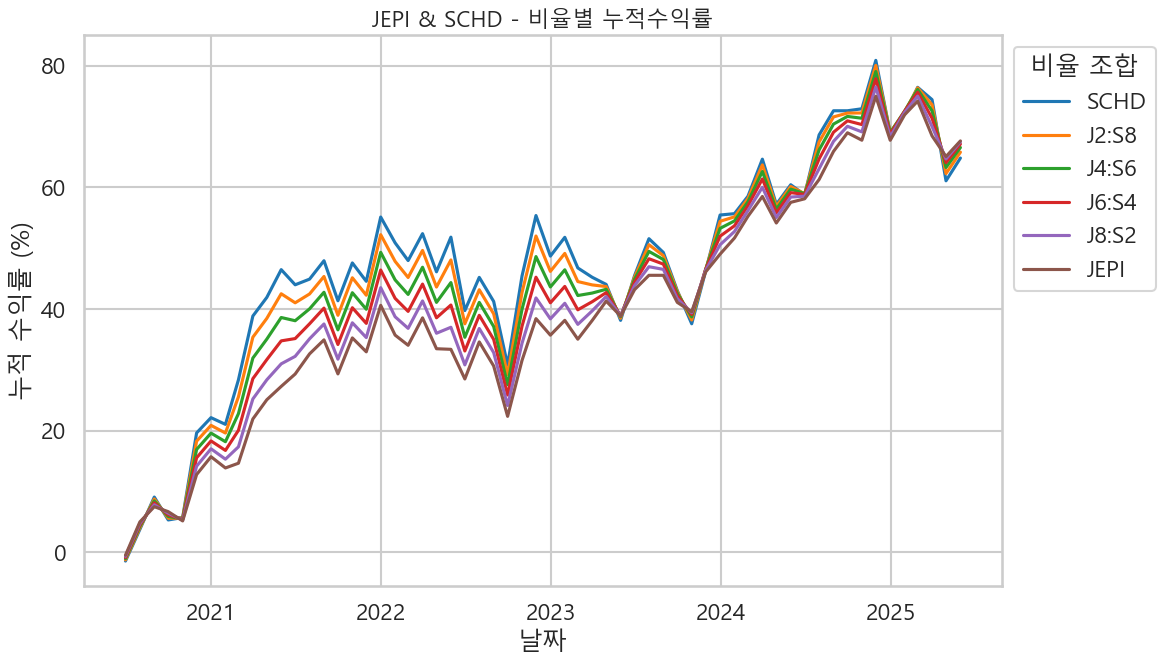

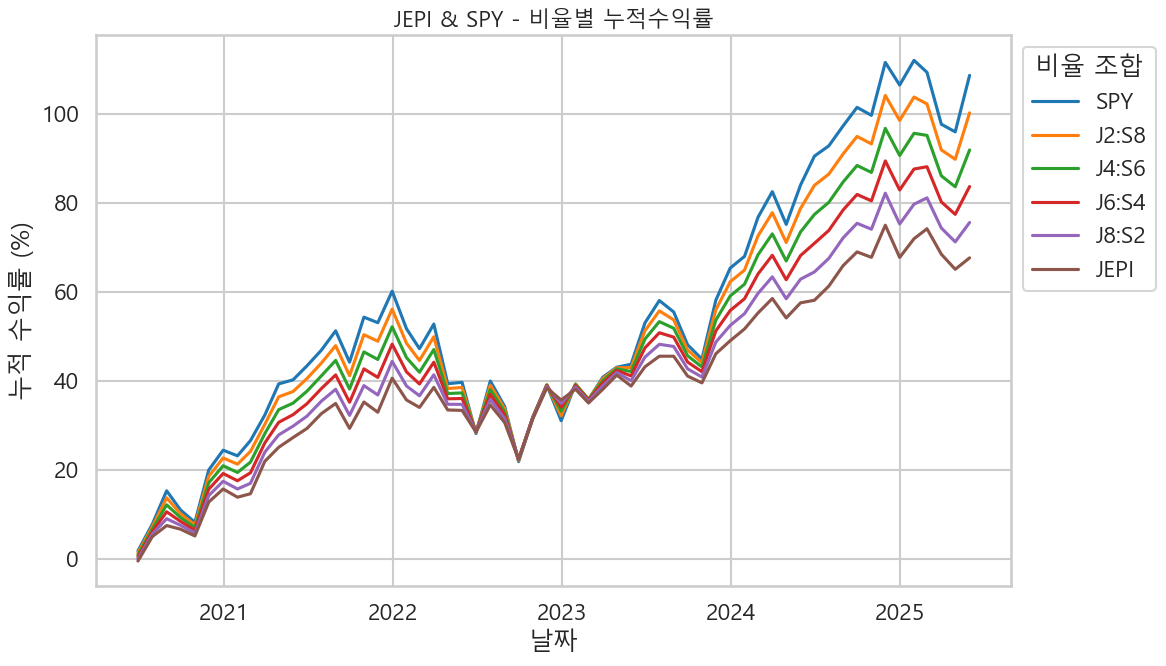

C:\Users\KDT6\AppData\Local\Temp\ipykernel_6924\4211001174.py:38: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
D:\Project\Python_Source\Test01\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


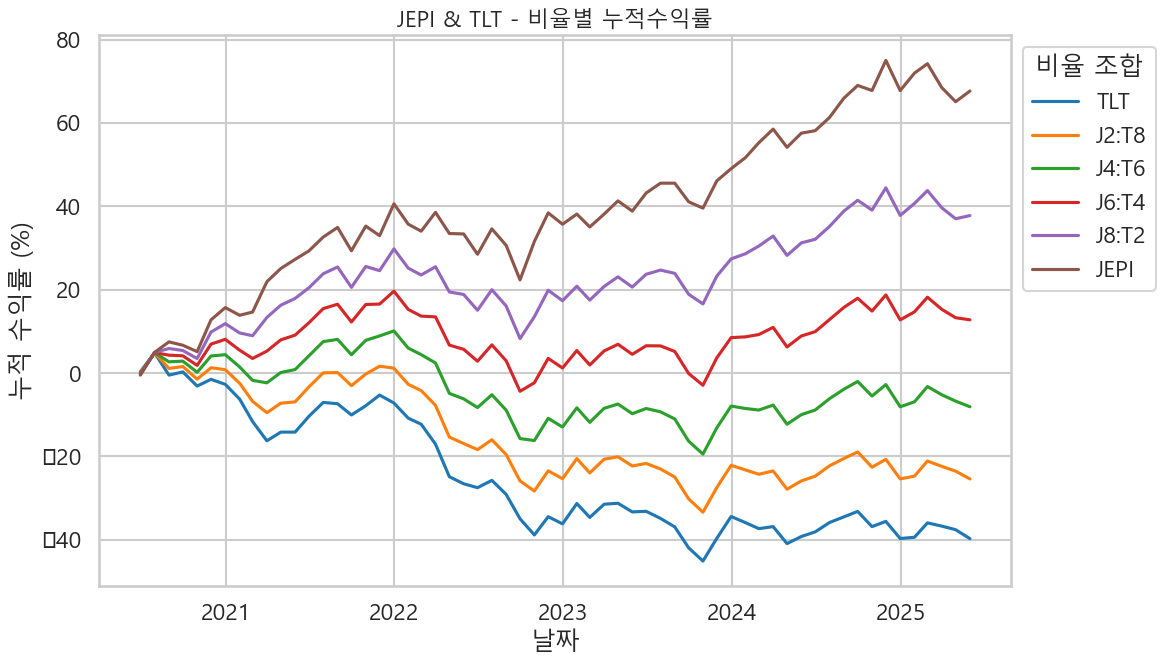

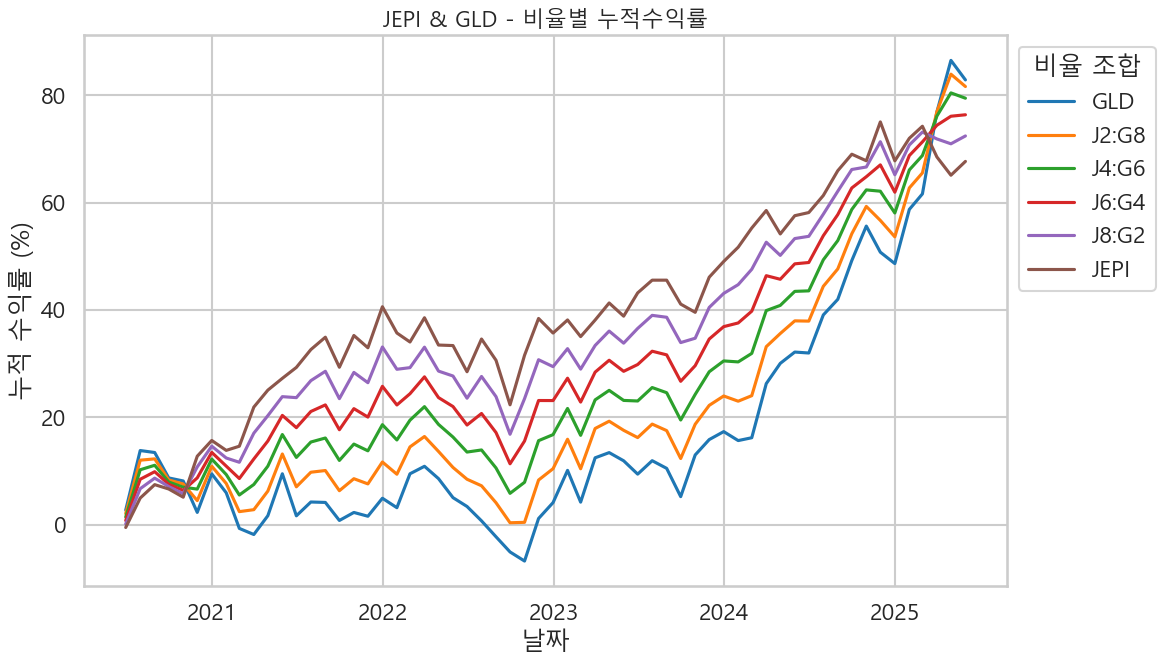

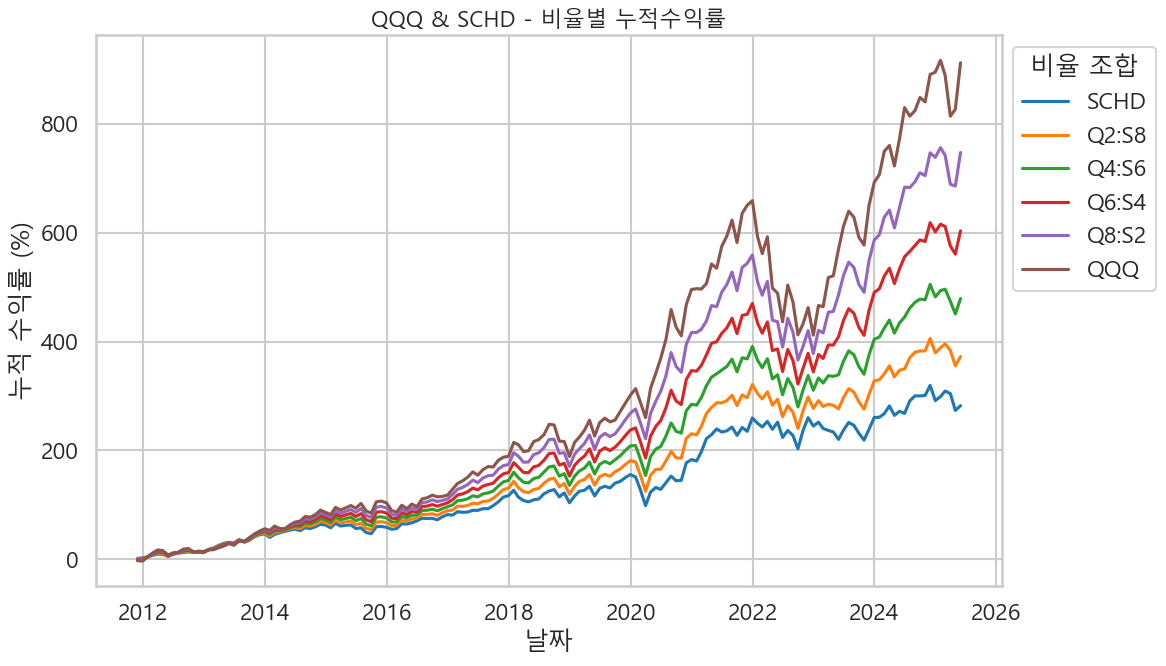

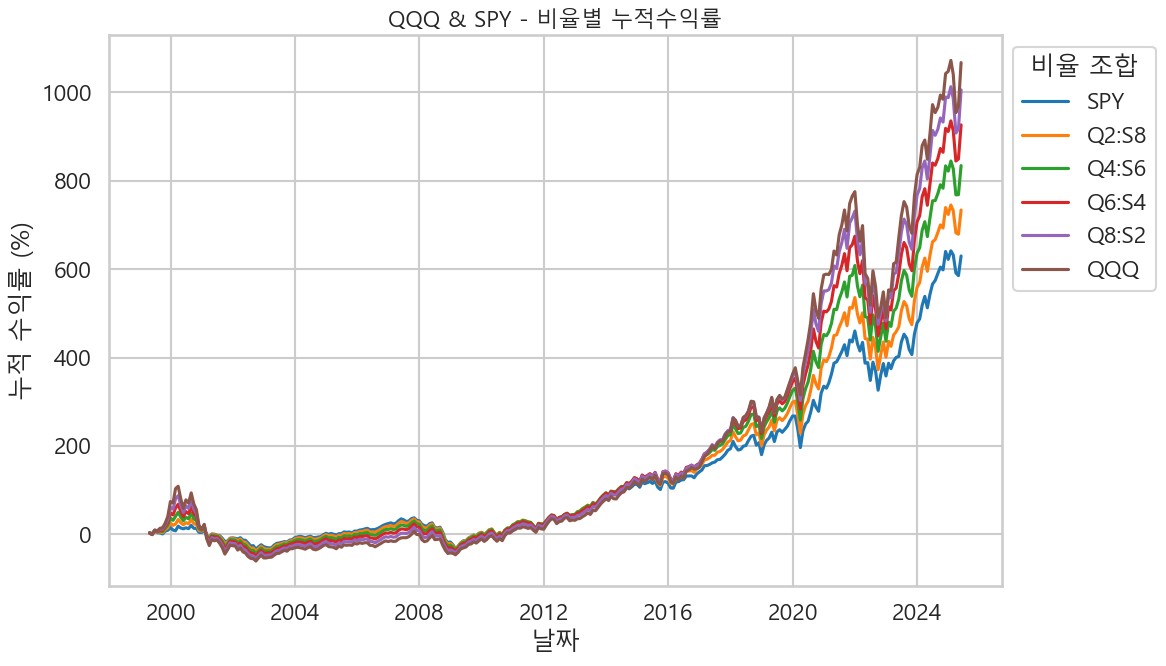

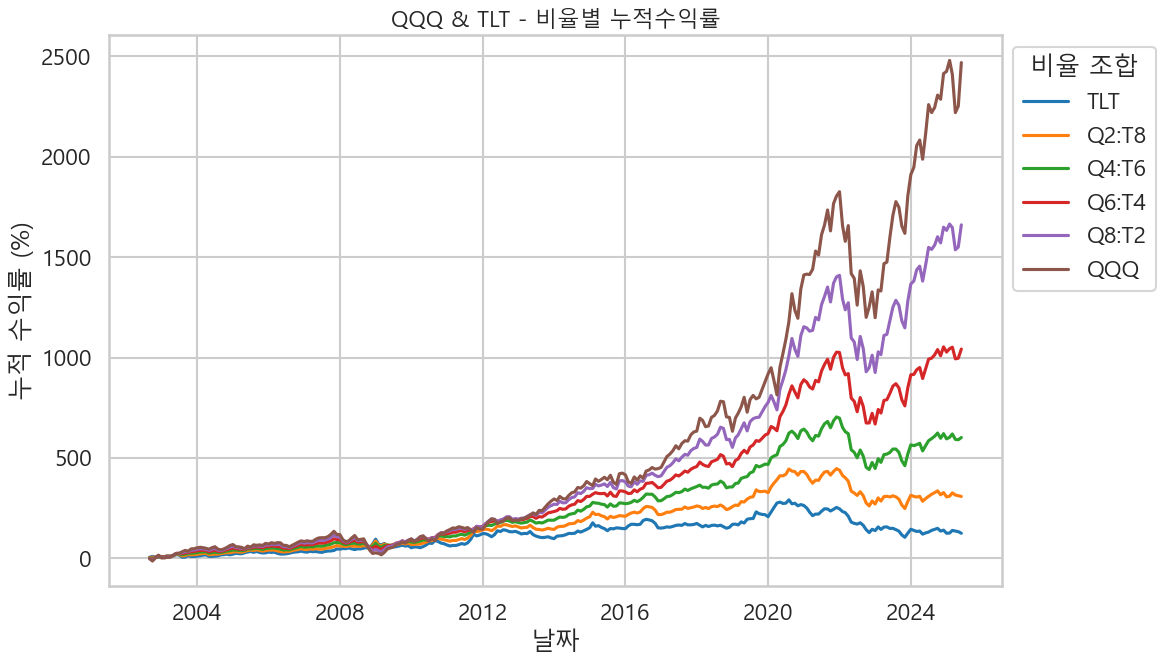

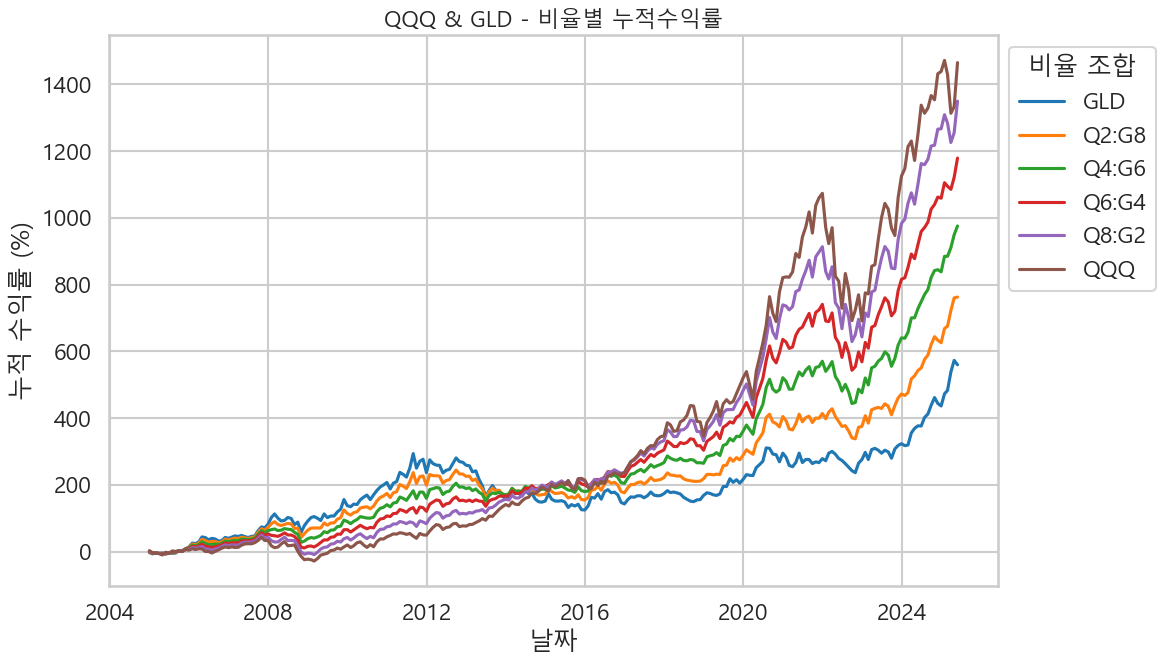

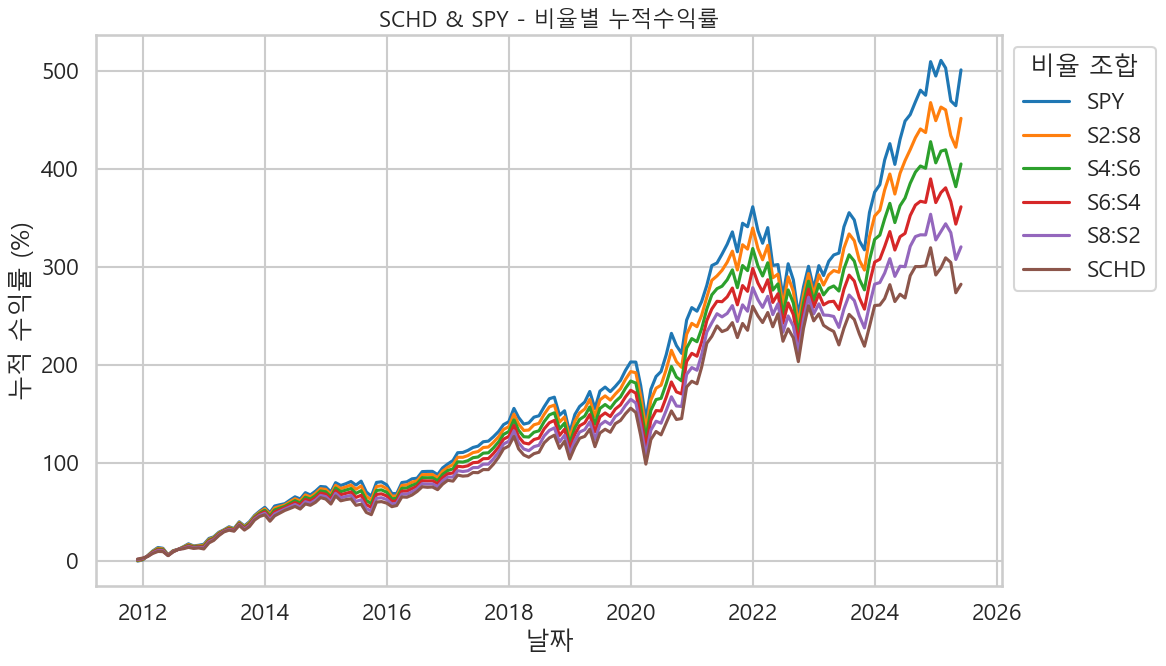

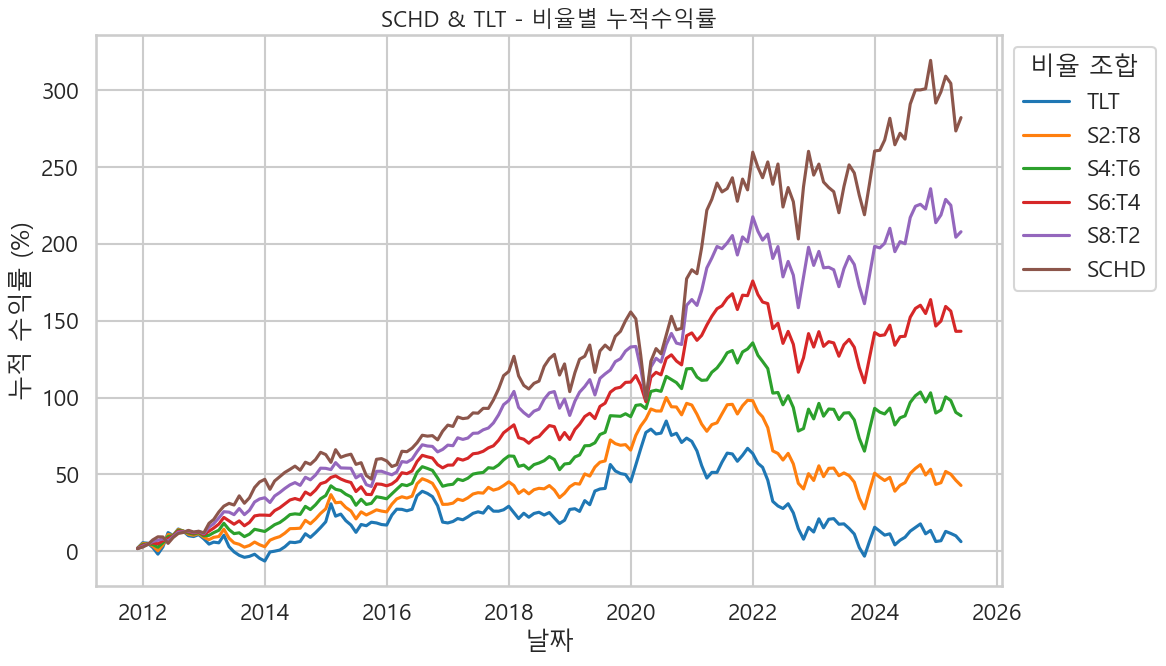

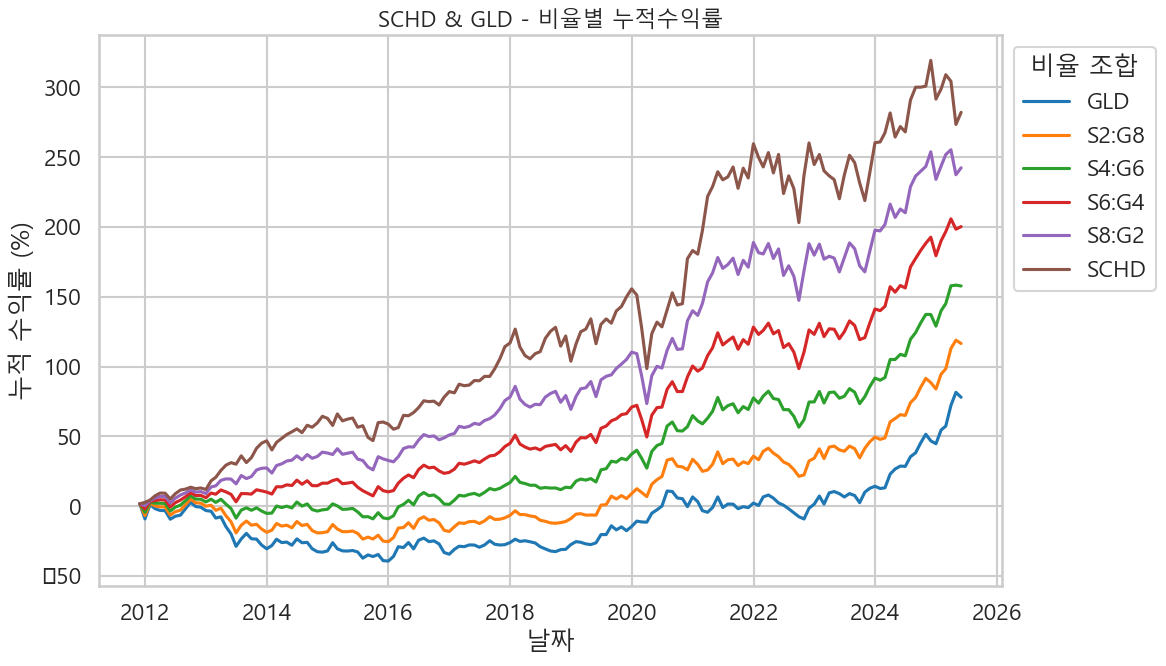

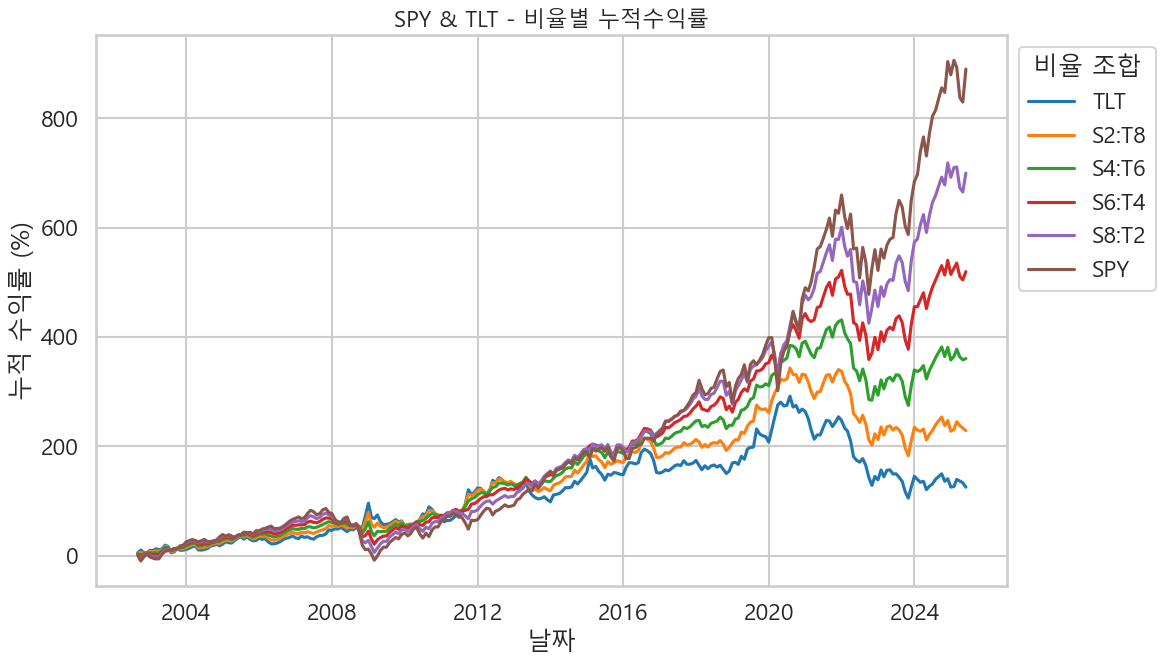

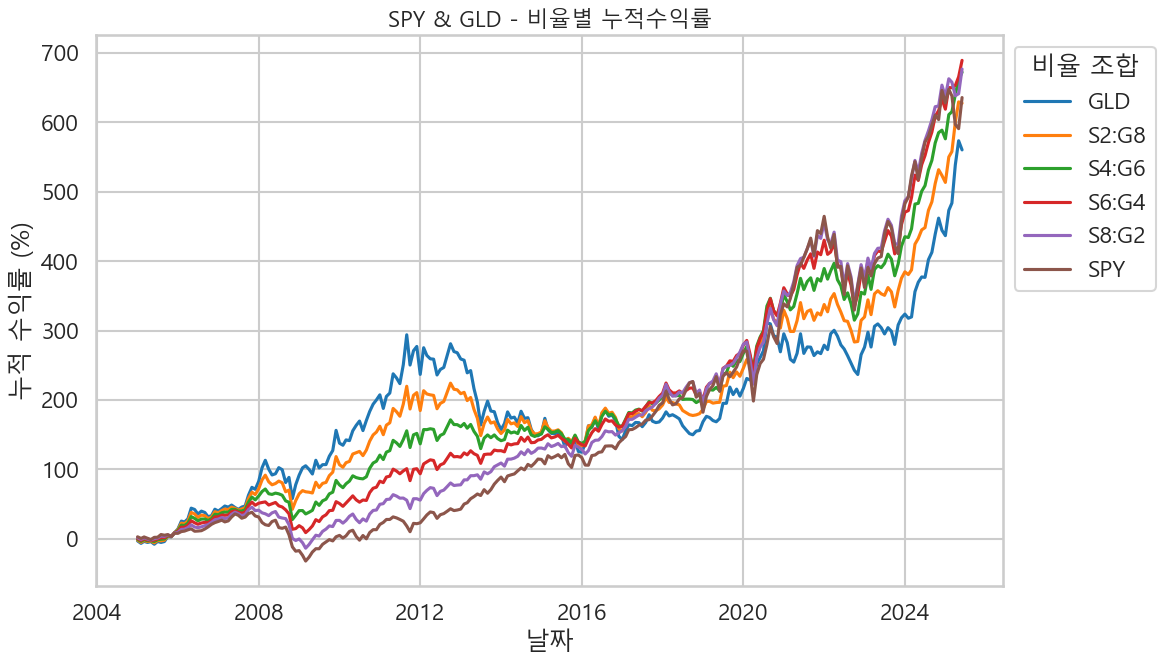

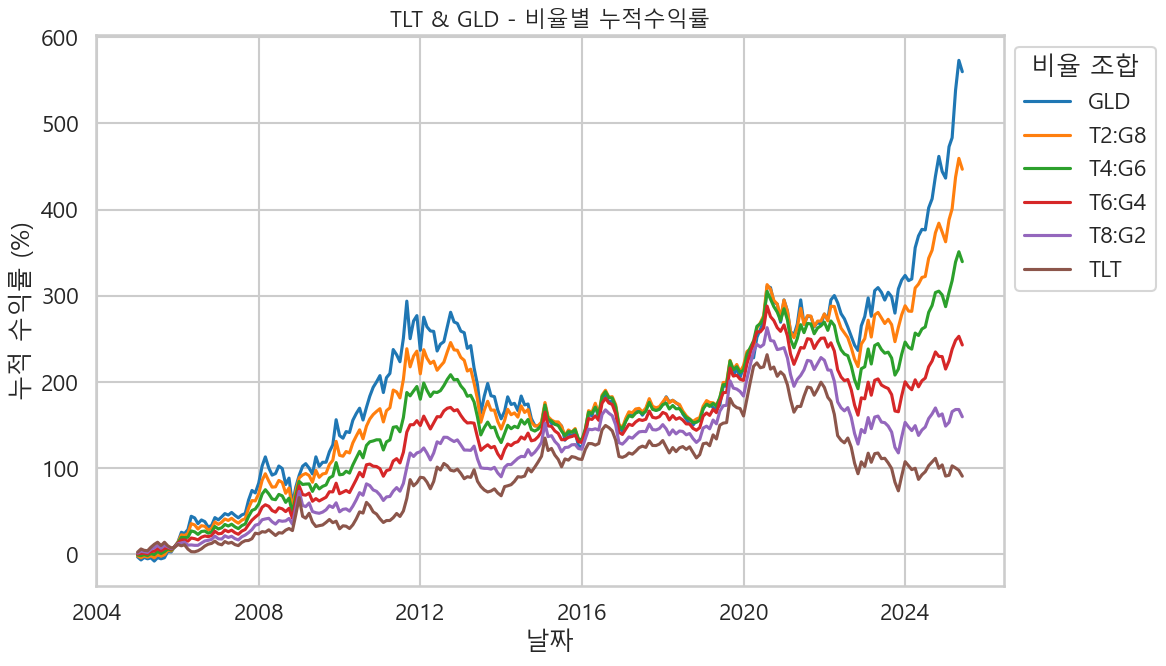

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# ✅ 2 간격 비율 리스트
ratios = [(i, 10 - i) for i in range(0, 11, 2)]  # (0,10), (2,8), ..., (10,0)

def plot_combinations_linegraphs(indiv_returns_df, combinations, ratios):
    for comb in combinations:
        t1, t2 = comb
        returns1 = indiv_returns_df[t1]
        returns2 = indiv_returns_df[t2]

        plt.figure(figsize=(12, 7))
        plt.title(f"{t1} & {t2} - 비율별 누적수익률", fontsize=16)
        plt.xlabel("날짜")
        plt.ylabel("누적 수익률 (%)")

        dates = indiv_returns_df.index

        for a, b in ratios:
            # a:b 비율로 수익률 가중평균 합산
            weighted_return = (returns1 * a + returns2 * b) / (a + b)
            cumulative_return = (1 + weighted_return).cumprod() - 1
            cumulative_return_pct = cumulative_return * 100

            # ✅ 라벨: 10일 경우 풀네임, 그 외는 J2:Q8 형식
            if a == 10:
                label = f"{t1}"
            elif b == 10:
                label = f"{t2}"
            else:
                label = f"{t1[0]}{a}:{t2[0]}{b}"

            plt.plot(dates, cumulative_return_pct, label=label)

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="비율 조합")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# ✅ 함수 호출
plot_combinations_linegraphs(indiv_returns_df, two_combinations, ratios)

## 버블차트 비율별
- ex) SCHD, QQQ, S9:Q1, S8:Q2, ...

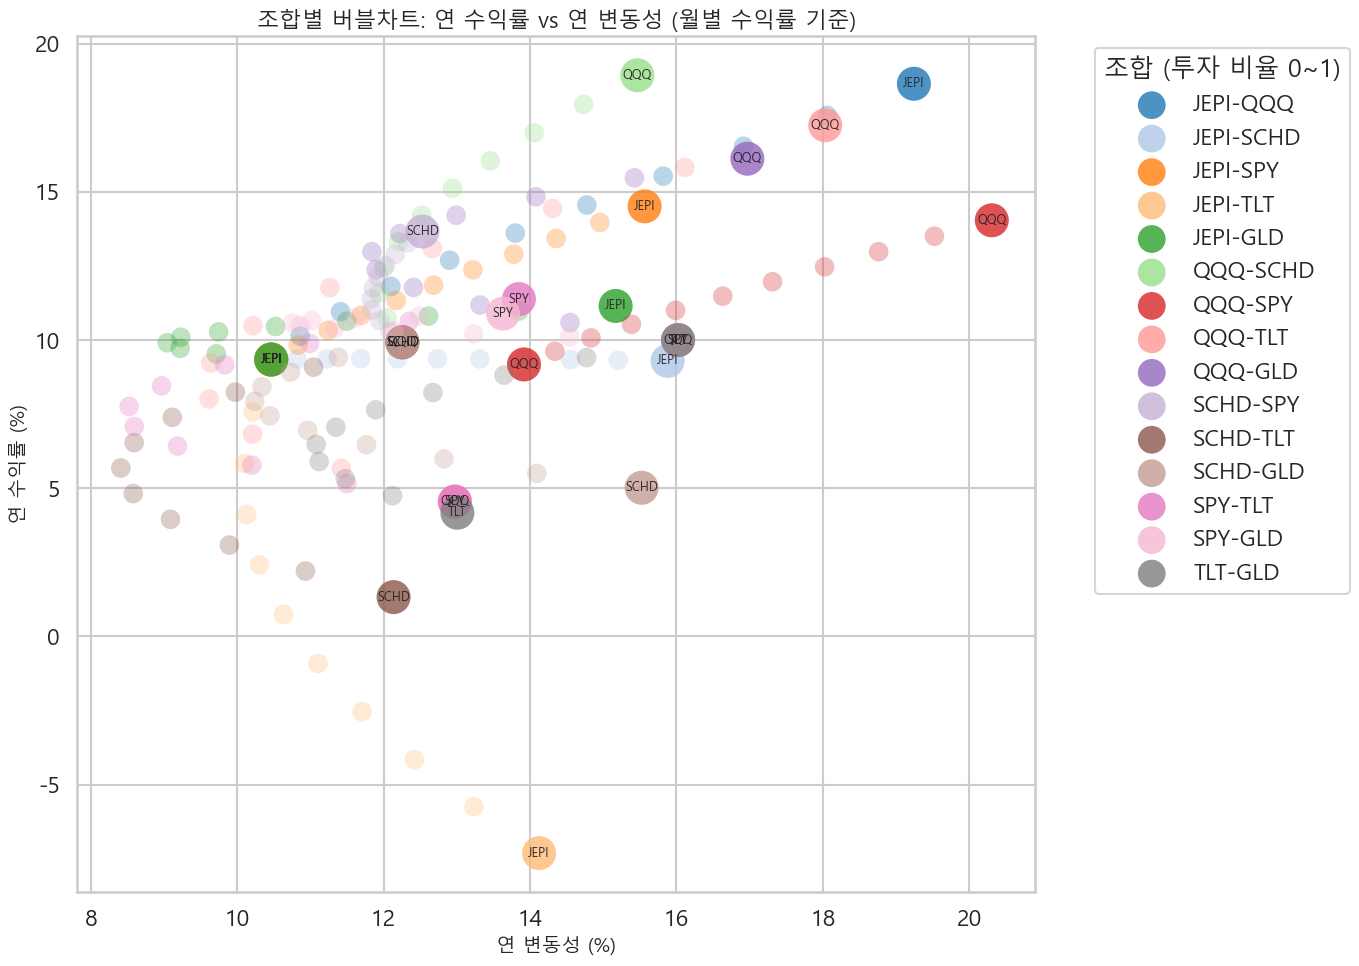

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# <1>에서 불러온 indiv_returns_df 사용 (각 종목 월별 수익률 데이터)

tickers = ['JEPI', 'QQQ', 'SCHD', 'SPY', 'TLT', 'GLD']
two_combinations = list(combinations(tickers, 2))

results = []

for comb in two_combinations:
    t1, t2 = comb
    df = indiv_returns_df[[t1, t2]].dropna()

    # 연산 결과가 NaN 방지용 - 최소 공통 구간 필터링
    df = df.dropna()

    for w in range(11):
        w1 = w / 10
        w2 = 1 - w1

        label = f"{t1}:{w1:.1f} / {t2}:{w2:.1f}"

        # 포트폴리오 월별 수익률 = 가중치 합산
        portfolio_return = df[t1] * w1 + df[t2] * w2

        # 연간 수익률 (평균)
        annual_return = ((1 + portfolio_return).resample('YE').prod() - 1).mean() * 100

        # 연간 변동성 (표준편차 * sqrt(12))
        annual_vol = portfolio_return.resample('YE').std().mean() * np.sqrt(12) * 100

        results.append({
            'Combination': f"{t1}-{t2}",
            'Label': label,
            'Return': annual_return,
            'Volatility': annual_vol,
            'Weight1': w1,
            'Weight2': w2
        })

df_result = pd.DataFrame(results)

# 그래프 그리기
plt.figure(figsize=(14, 10))

# 조합별로 색상 분리 (colormap에서 순차적으로)
unique_combinations = df_result['Combination'].unique()
colors_map = plt.colormaps['tab20']

# bubble_size와 alpha 정의
bubble_size = 200  # 버블 크기 설정
alpha = 0.3  # 투명도 설정

for i, comb in enumerate(unique_combinations):
    df_sub = df_result[df_result['Combination'] == comb]

    sizes = np.where((df_sub['Weight1'] == 0) | (df_sub['Weight1'] == 1), bubble_size*3, bubble_size)
    alphas = np.where((df_sub['Weight1'] == 0) | (df_sub['Weight1'] == 1), 0.8, alpha)

    base_color = colors_map(i)  # RGBA 튜플
    colors_rgba = np.tile(base_color, (len(df_sub), 1))
    colors_rgba[:, 3] = alphas  # alpha 적용

    plt.scatter(df_sub['Volatility'], df_sub['Return'],
                s=sizes,
                facecolors=colors_rgba,
                edgecolors='none',
                label=comb)

    for _, row in df_sub[(df_sub['Weight1'] == 0) | (df_sub['Weight1'] == 1)].iterrows():
        plt.text(row['Volatility'], row['Return'], row['Label'].split(':')[0], fontsize=9, ha='center', va='center')

plt.title("조합별 버블차트: 연 수익률 vs 연 변동성 (월별 수익률 기준)", fontsize=16)
plt.xlabel("연 변동성 (%)", fontsize=14)
plt.ylabel("연 수익률 (%)", fontsize=14)
plt.grid(True)
plt.legend(title="조합 (투자 비율 0~1)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

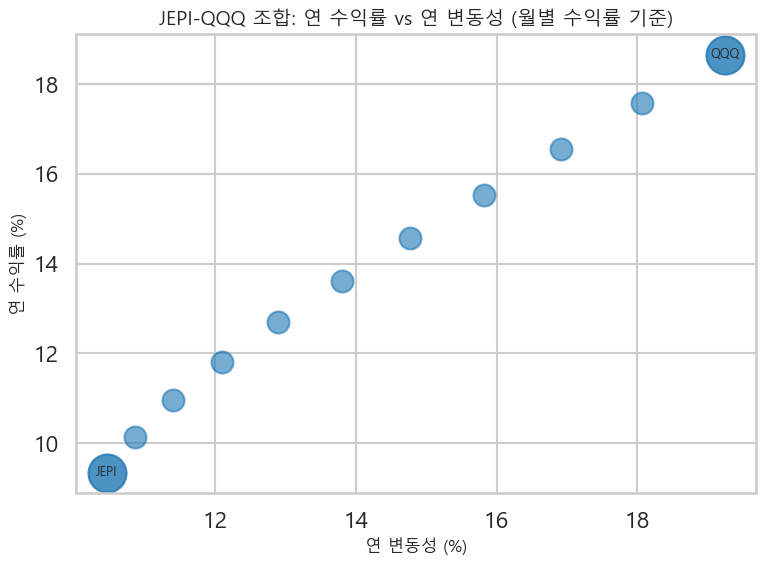

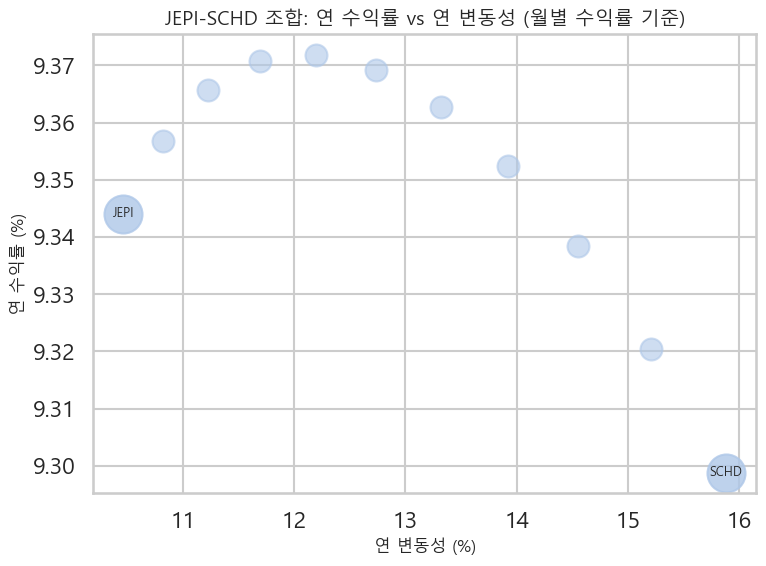

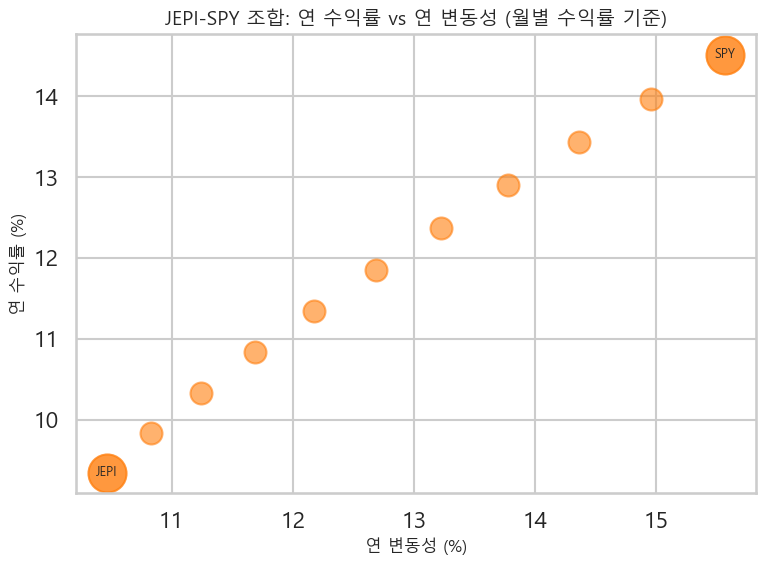

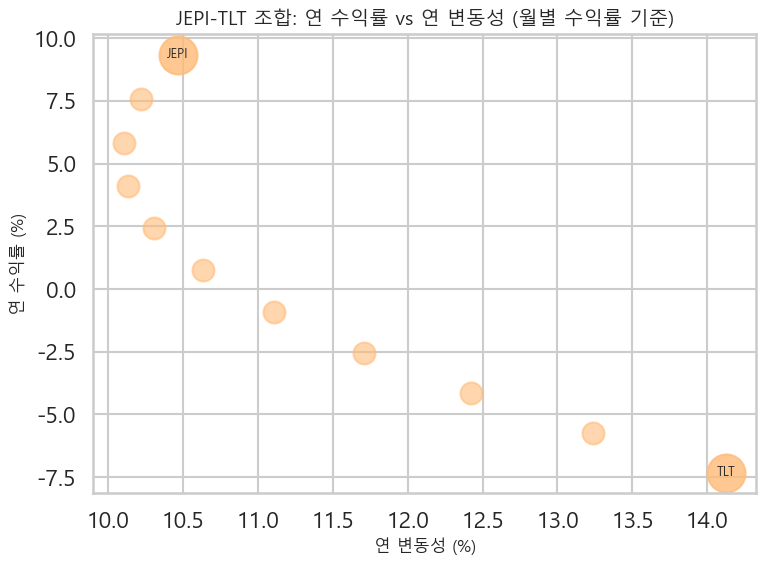

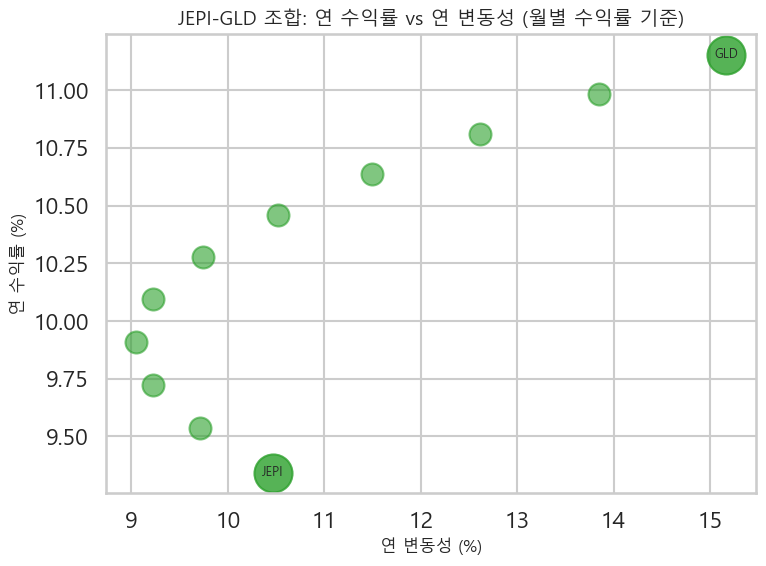

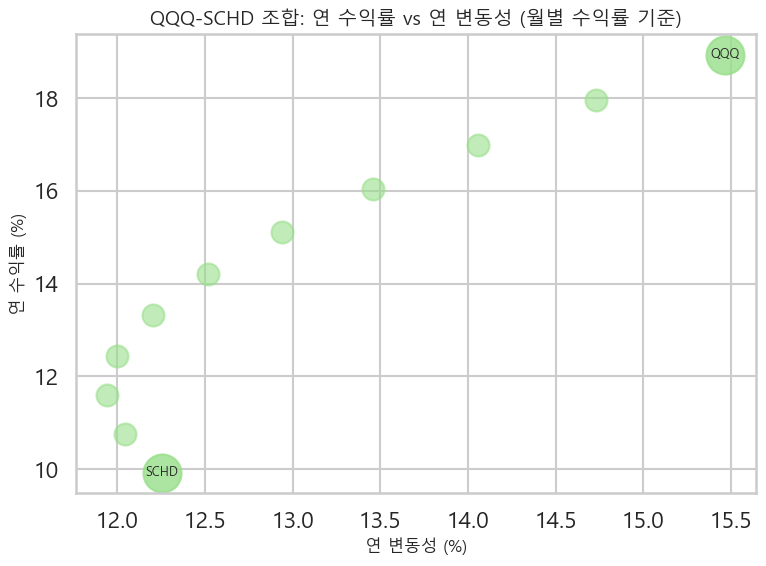

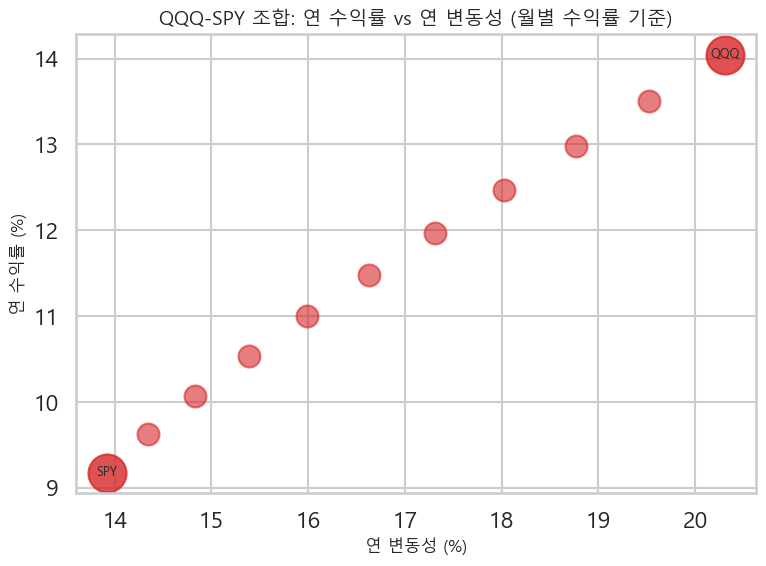

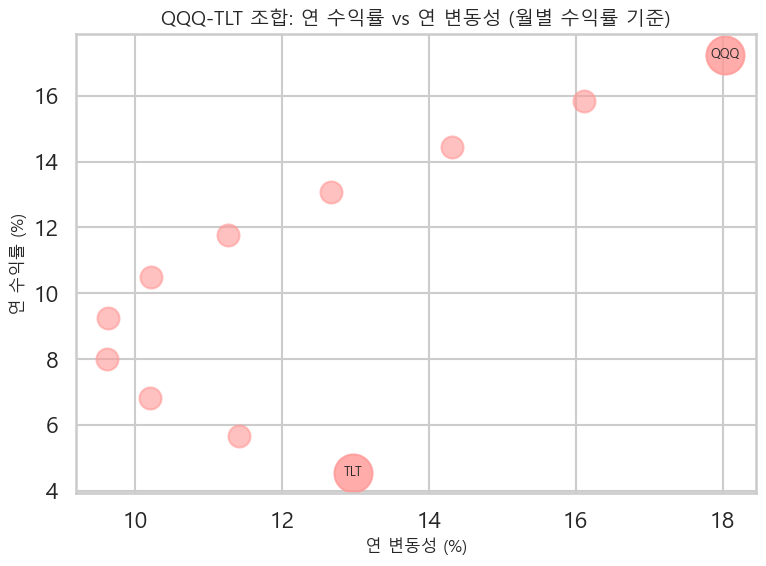

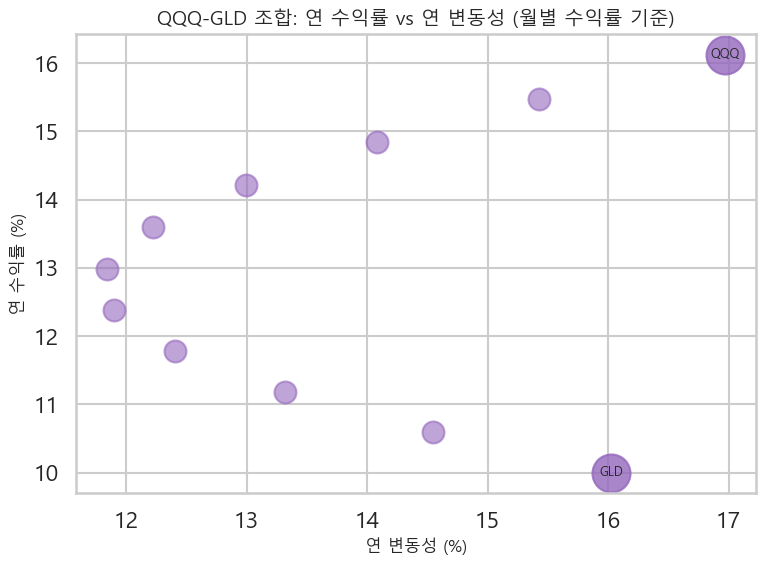

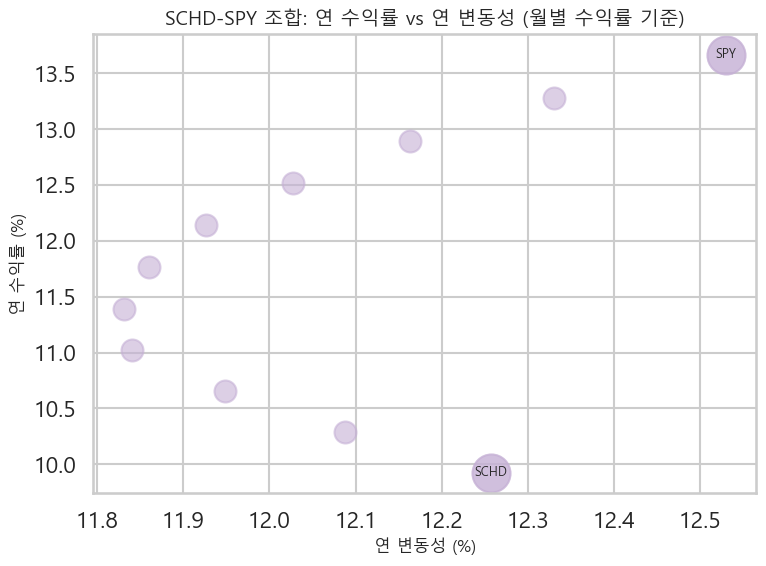

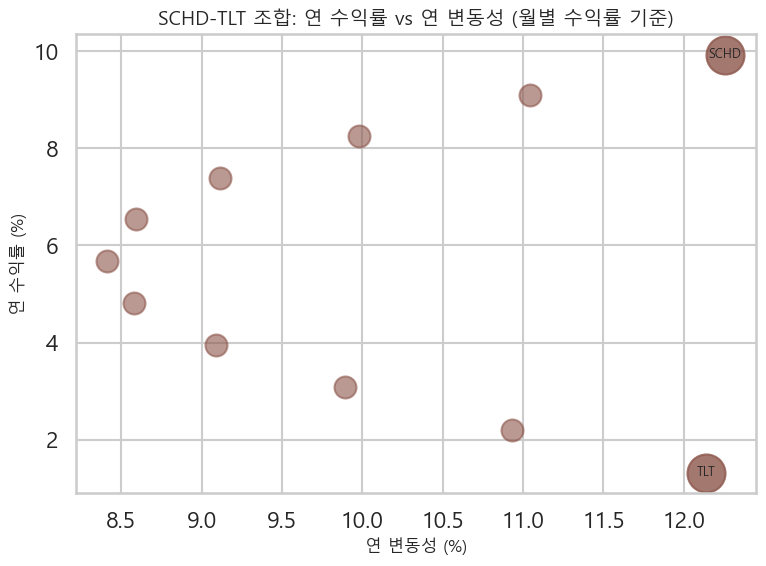

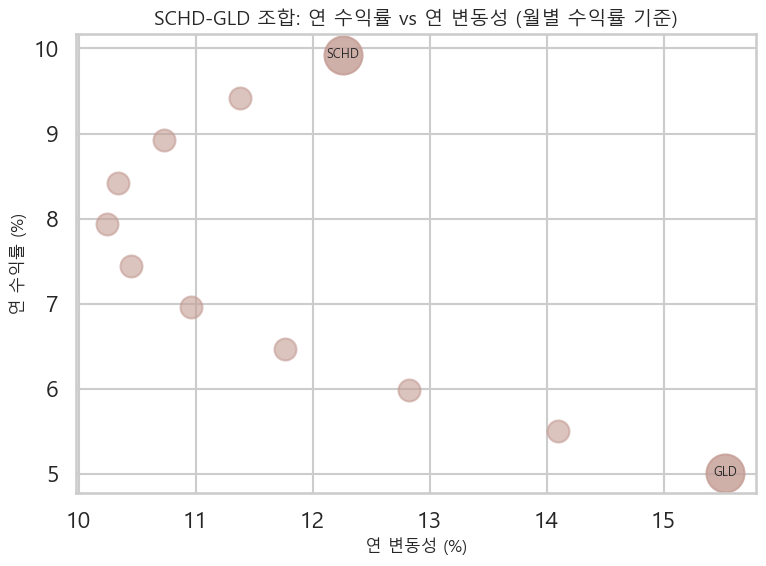

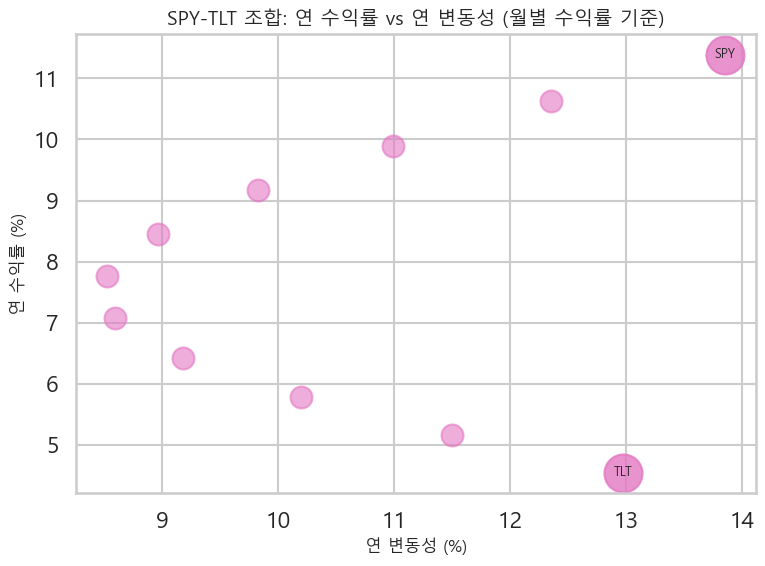

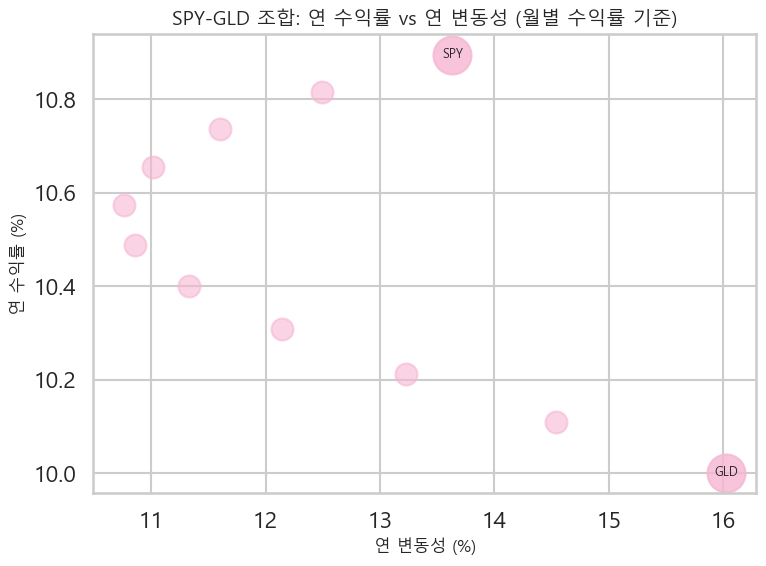

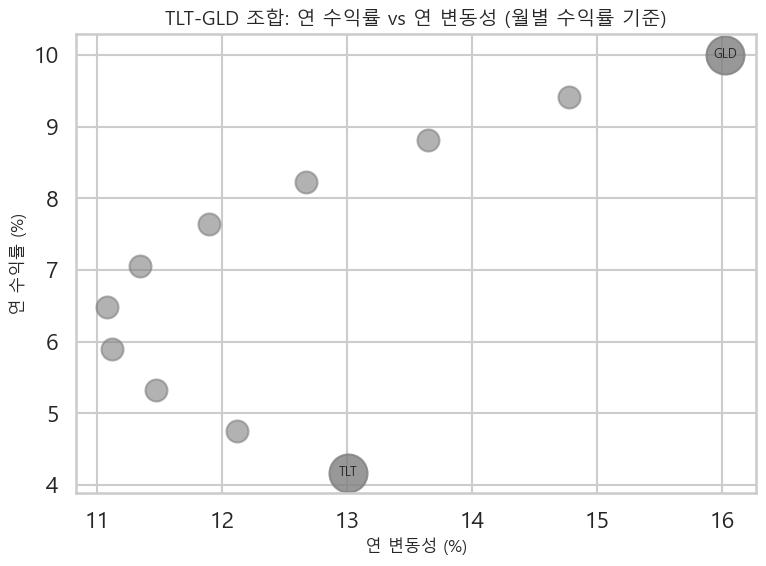

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 예시: indiv_returns_df가 월별 수익률을 가진 데이터프레임이라고 가정
# tickers = ['JEPI', 'QQQ', 'SCHD', 'SPY', 'TLT', 'GLD']
# two_combinations = list(combinations(tickers, 2))

results = []

for comb in two_combinations:
    t1, t2 = comb
    df = indiv_returns_df[[t1, t2]].dropna()

    # 최소 공통 구간 필터링
    df = df.dropna()

    for w in range(11):
        w1 = w / 10
        w2 = 1 - w1

        label = f"{t1}:{w1:.1f} / {t2}:{w2:.1f}"

        portfolio_return = df[t1] * w1 + df[t2] * w2

        # 연수익률 및 연변동성 계산
        annual_return = ((1 + portfolio_return).resample('YE').prod() - 1).mean() * 100
        annual_vol = portfolio_return.resample('YE').std().mean() * np.sqrt(12) * 100

        results.append({
            'Combination': f"{t1}-{t2}",
            'Label': label,
            'Return': annual_return,
            'Volatility': annual_vol,
            'Weight1': w1,
            'Weight2': w2
        })

df_result = pd.DataFrame(results)

unique_combinations = df_result['Combination'].unique()
colors_map = plt.colormaps['tab20']  # 최신 방식

bubble_size = 250
alpha_default = 0.6
alpha_edge = 0.8

for i, comb in enumerate(unique_combinations):
    df_sub = df_result[df_result['Combination'] == comb]

    plt.figure(figsize=(8, 6))
    color = colors_map(i)

    for _, row in df_sub.iterrows():
        size = bubble_size * 3 if (row['Weight1'] == 0 or row['Weight1'] == 1) else bubble_size
        alpha = alpha_edge if (row['Weight1'] == 0 or row['Weight1'] == 1) else alpha_default

        plt.scatter(row['Volatility'], row['Return'], s=size, color=color, alpha=alpha)

        # 가중치 0 또는 1인 버블에만 티커명 표시
        if row['Weight1'] == 1:
            ticker_label = row['Label'].split(' / ')[0].split(':')[0]
        elif row['Weight1'] == 0:
            ticker_label = row['Label'].split(' / ')[1].split(':')[0]
        else:
            ticker_label = ''

        if ticker_label:
            plt.text(row['Volatility'], row['Return'], ticker_label,
                     fontsize=9, ha='center', va='center')

    plt.title(f"{comb} 조합: 연 수익률 vs 연 변동성 (월별 수익률 기준)", fontsize=14)
    plt.xlabel("연 변동성 (%)", fontsize=12)
    plt.ylabel("연 수익률 (%)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

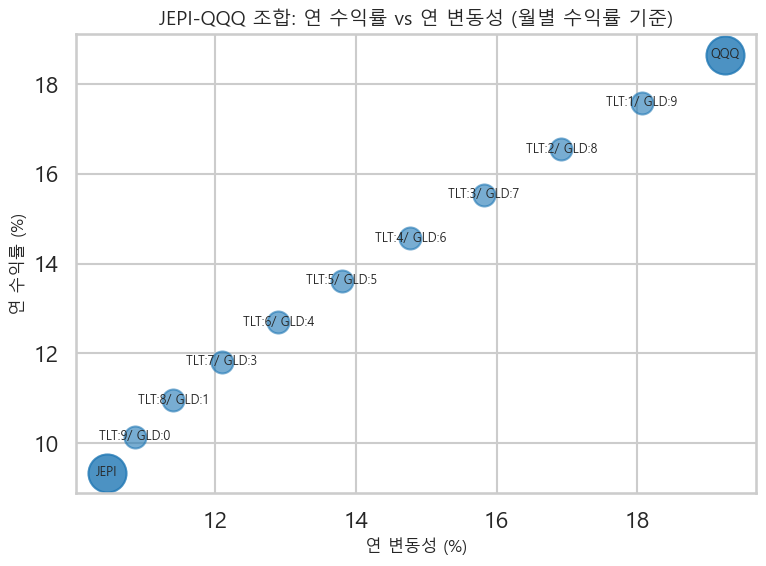

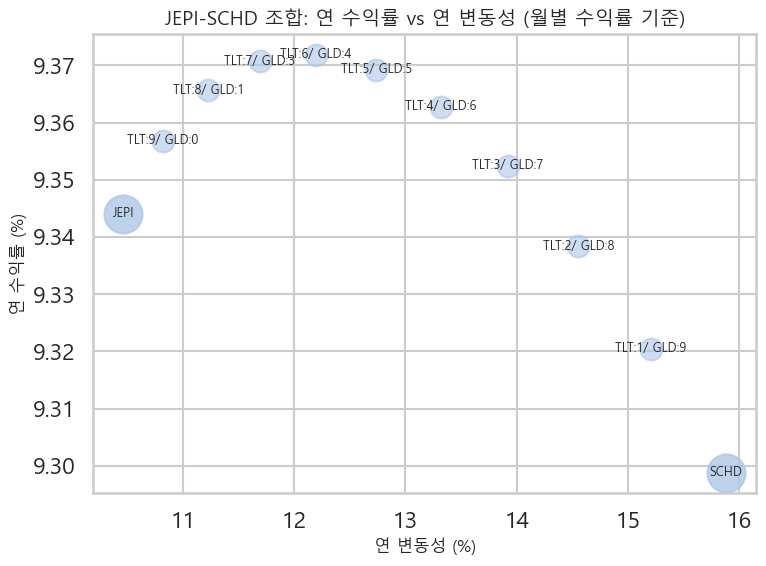

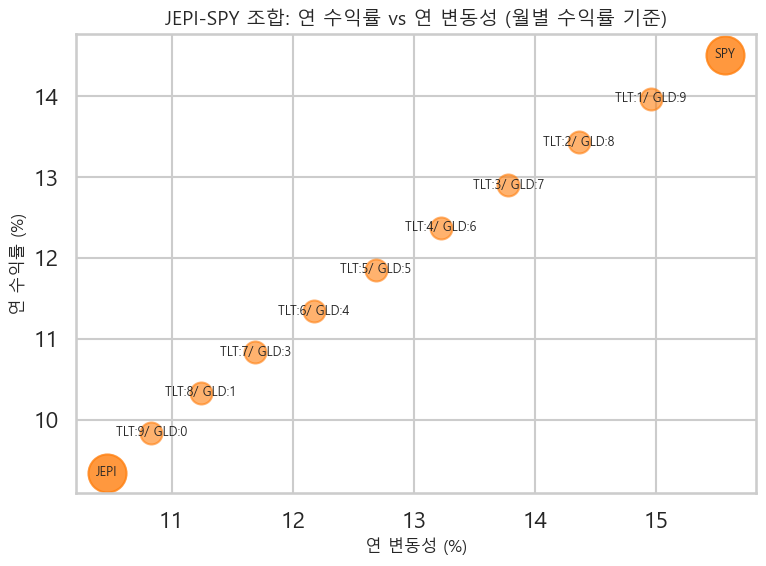

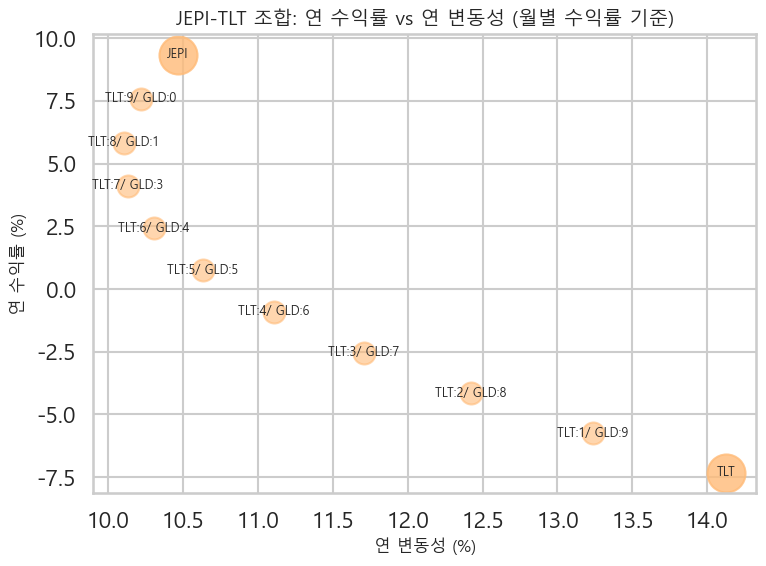

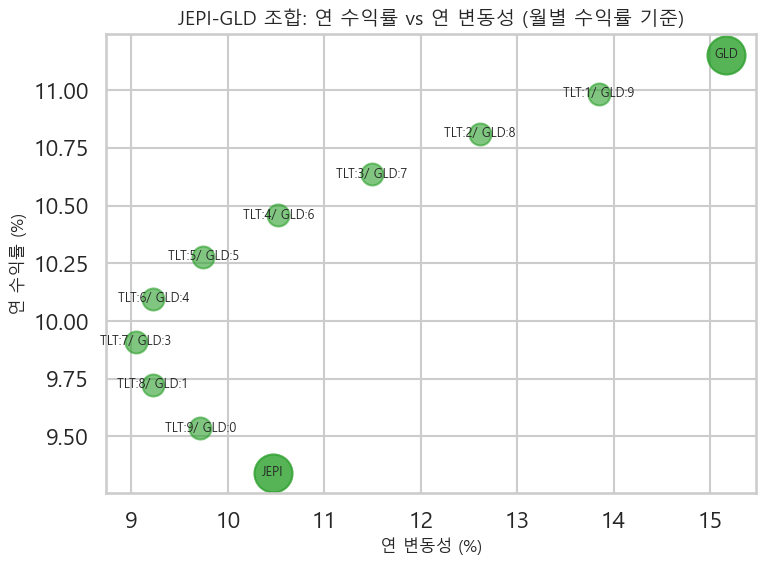

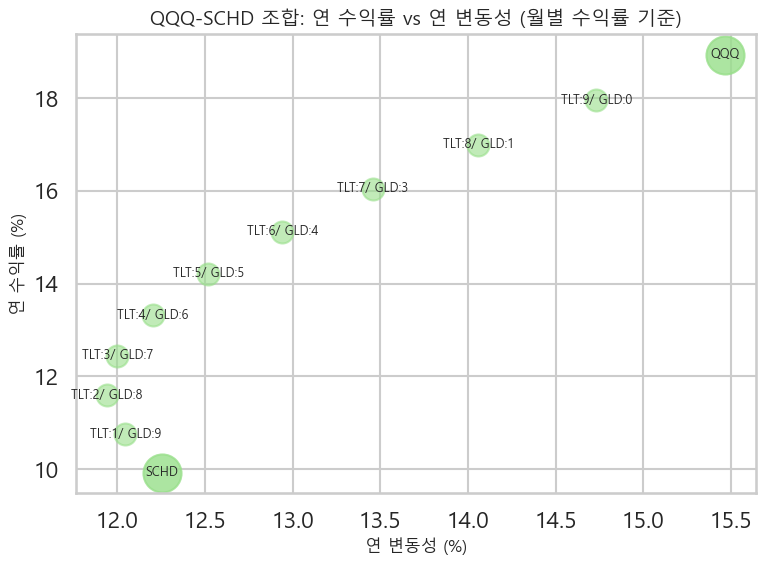

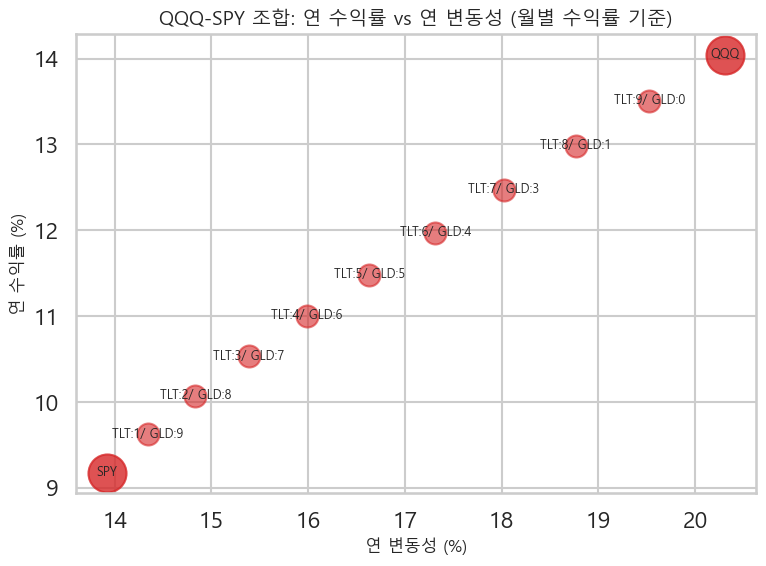

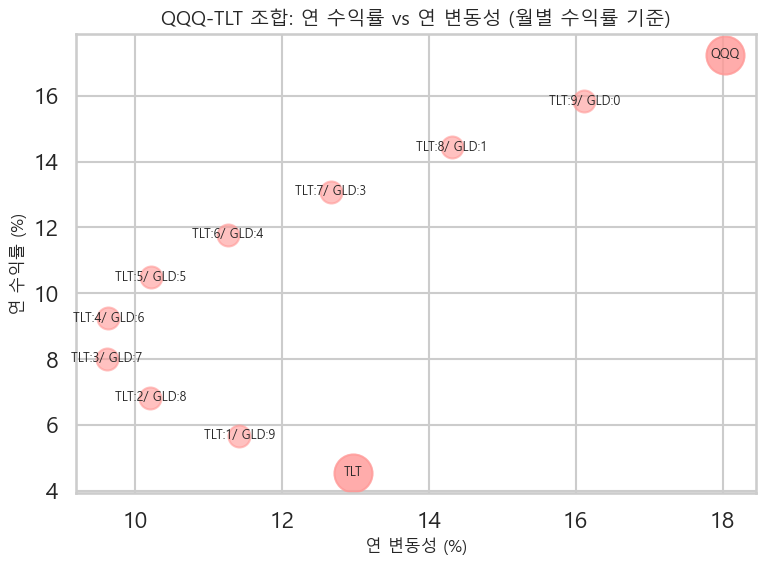

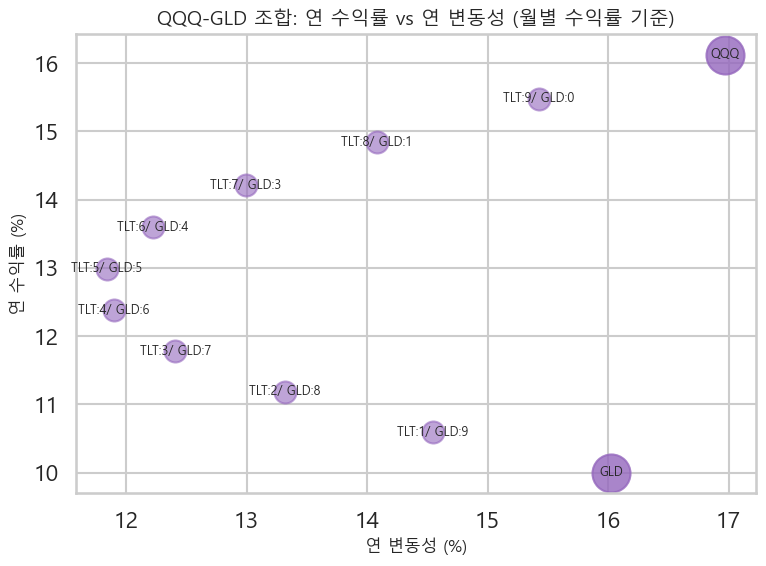

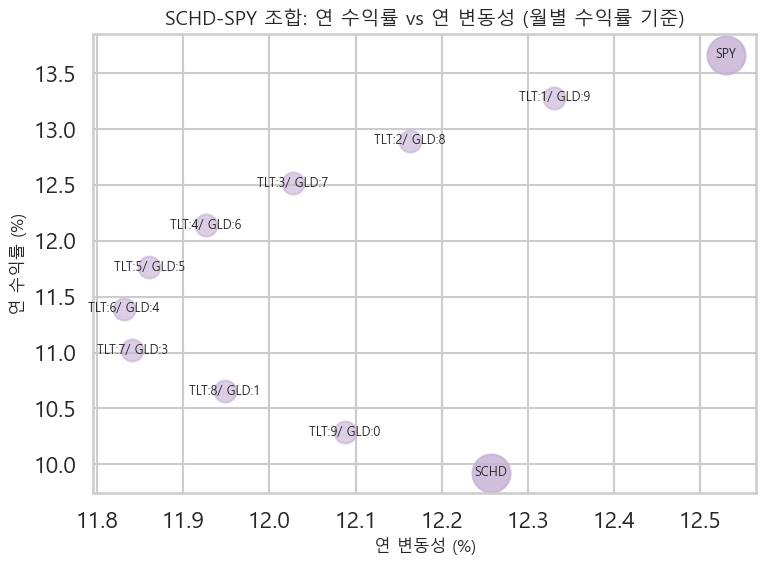

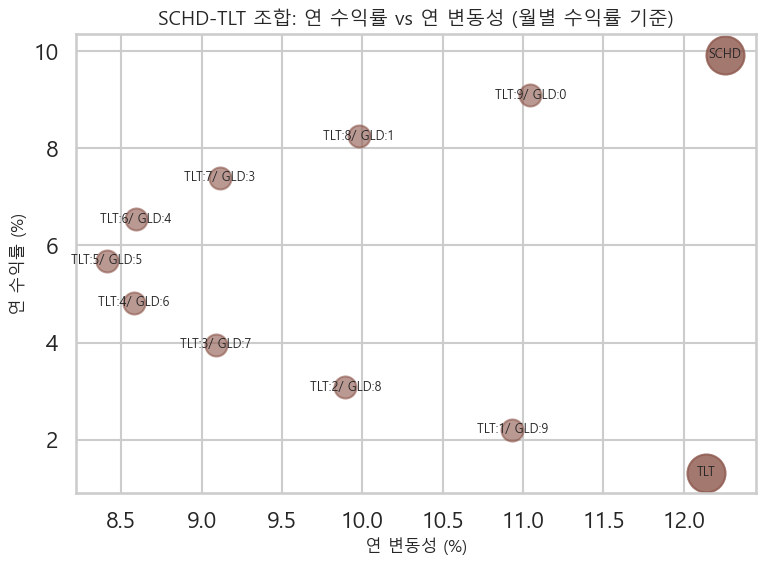

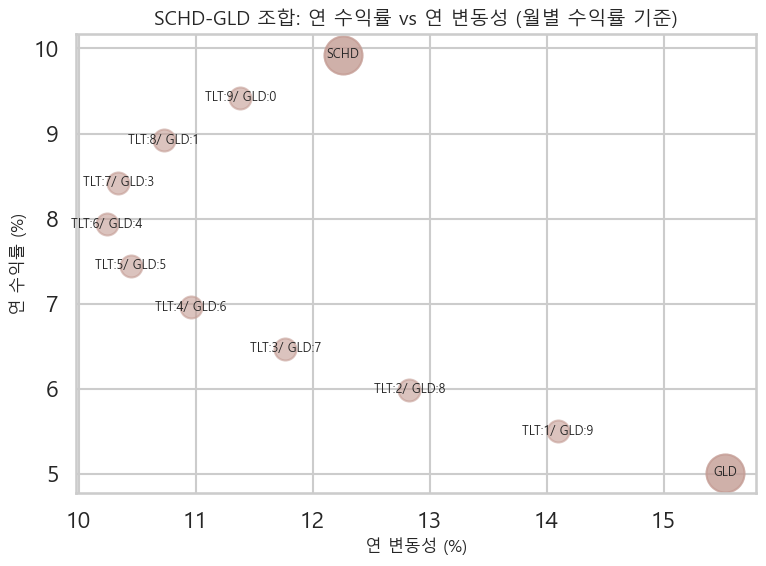

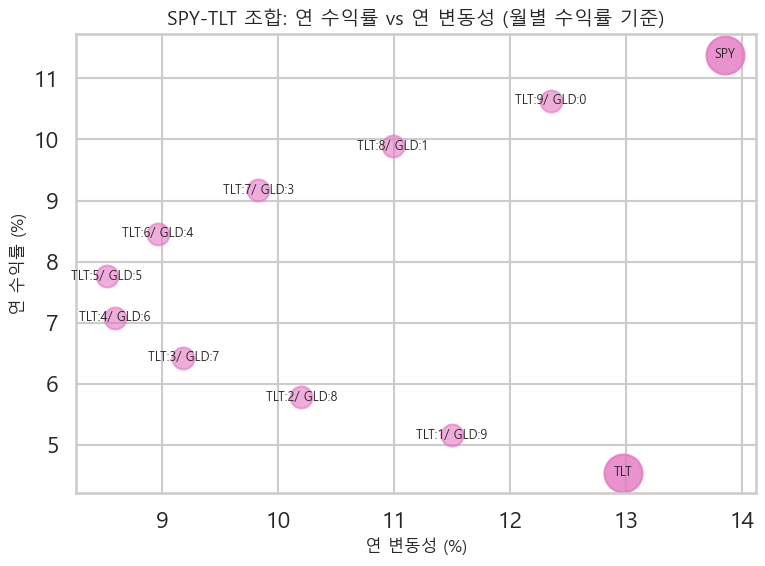

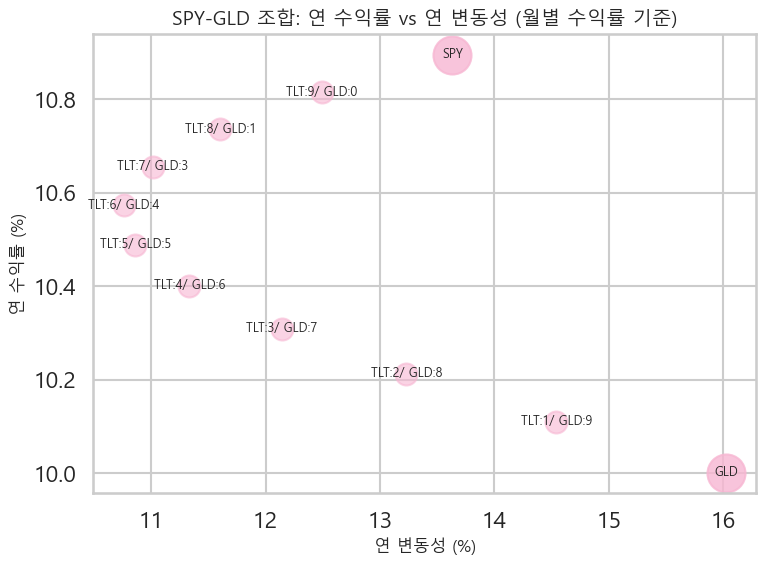

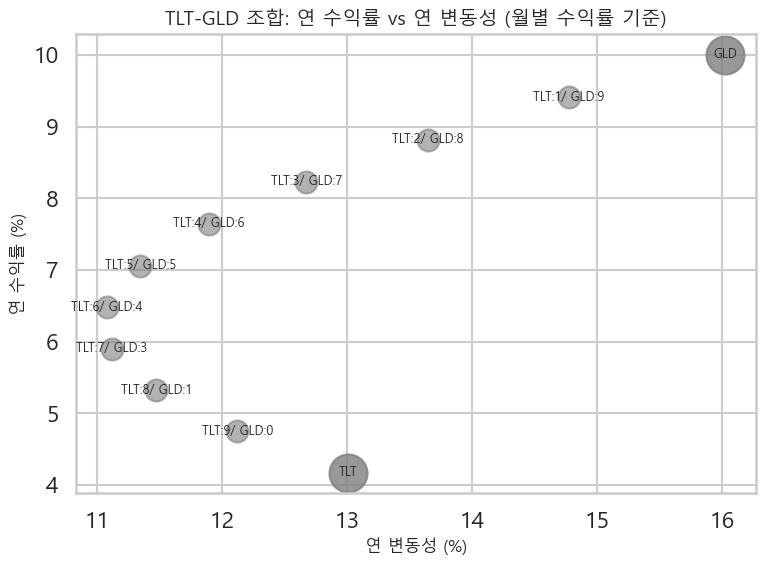

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 예시: indiv_returns_df가 월별 수익률을 가진 데이터프레임이라고 가정
# tickers = ['JEPI', 'QQQ', 'SCHD', 'SPY', 'TLT', 'GLD']
# two_combinations = list(combinations(tickers, 2))

results = []

for comb in two_combinations:
    t1, t2 = comb
    df = indiv_returns_df[[t1, t2]].dropna()

    # 최소 공통 구간 필터링
    df = df.dropna()

    for w in range(11):
        w1 = w / 10
        w2 = 1 - w1

        label = f"{t1}:{w1:.1f} / {t2}:{w2:.1f}"

        portfolio_return = df[t1] * w1 + df[t2] * w2

        # 연수익률 및 연변동성 계산
        annual_return = ((1 + portfolio_return).resample('YE').prod() - 1).mean() * 100
        annual_vol = portfolio_return.resample('YE').std().mean() * np.sqrt(12) * 100

        results.append({
            'Combination': f"{t1}-{t2}",
            'Label': label,
            'Return': annual_return,
            'Volatility': annual_vol,
            'Weight1': w1,
            'Weight2': w2
        })

df_result = pd.DataFrame(results)

unique_combinations = df_result['Combination'].unique()
colors_map = plt.colormaps['tab20']  # 최신 방식

bubble_size = 250
alpha_default = 0.6
alpha_edge = 0.8

for i, comb in enumerate(unique_combinations):
    df_sub = df_result[df_result['Combination'] == comb]

    plt.figure(figsize=(8, 6))
    color = colors_map(i)

    for _, row in df_sub.iterrows():
        size = bubble_size * 3 if (row['Weight1'] == 0 or row['Weight1'] == 1) else bubble_size
        alpha = alpha_edge if (row['Weight1'] == 0 or row['Weight1'] == 1) else alpha_default

        plt.scatter(row['Volatility'], row['Return'], s=size, color=color, alpha=alpha)

        # 10:0 또는 0:10일 때는 종목명(티커) 표시하고 비율은 표시하지 않음
        if row['Weight1'] == 1 and row['Weight2'] == 0:
            ticker_label = row['Label'].split(' / ')[0].split(':')[0]
            weight_label = ''
        elif row['Weight1'] == 0 and row['Weight2'] == 1:
            ticker_label = row['Label'].split(' / ')[1].split(':')[0]
            weight_label = ''
        else:
            ticker_label = ''
            weight_label = f"{t1}:{int(row['Weight1']*10)}/ {t2}:{int(row['Weight2']*10)}"

        # 종목명(티커)와 비율을 중간 비율에만 표시
        if ticker_label:
            plt.text(row['Volatility'], row['Return'], ticker_label,
                     fontsize=9, ha='center', va='center')

        # 중간 비율일 경우 가중치 비율을 표시
        if weight_label:
            plt.text(row['Volatility'], row['Return'], weight_label,
                     fontsize=9, ha='center', va='center')

    plt.title(f"{comb} 조합: 연 수익률 vs 연 변동성 (월별 수익률 기준)", fontsize=14)
    plt.xlabel("연 변동성 (%)", fontsize=12)
    plt.ylabel("연 수익률 (%)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

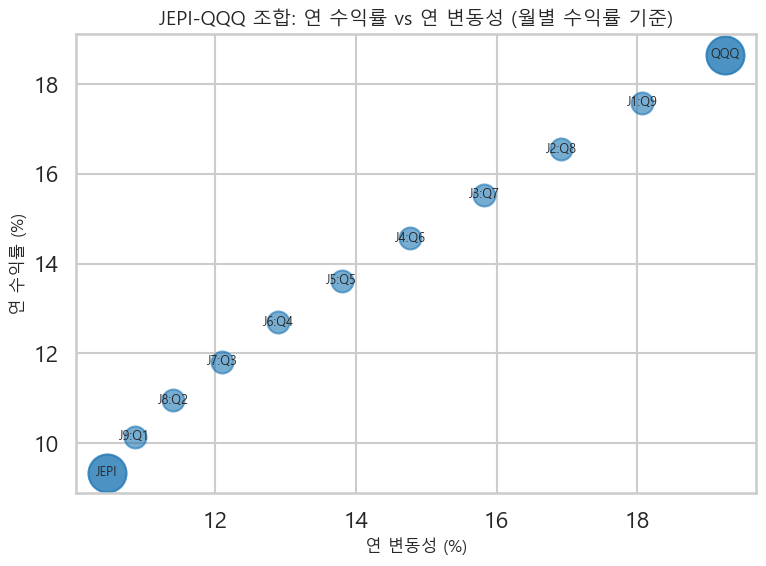

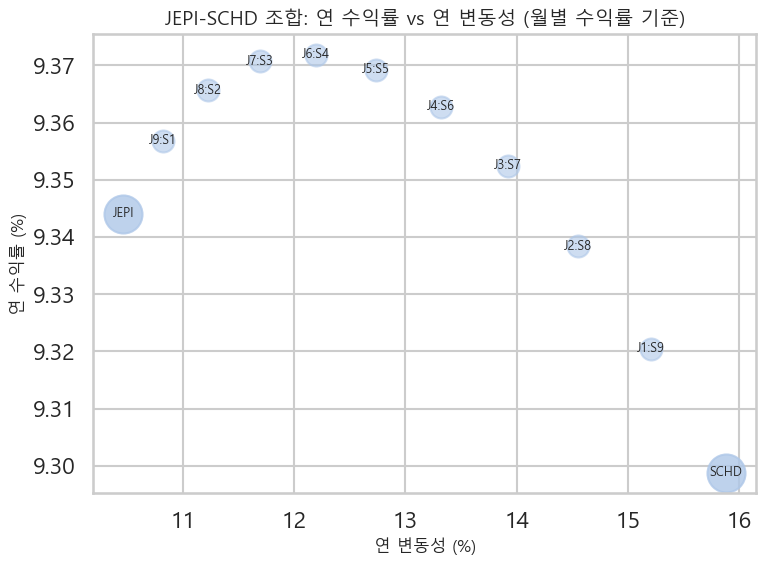

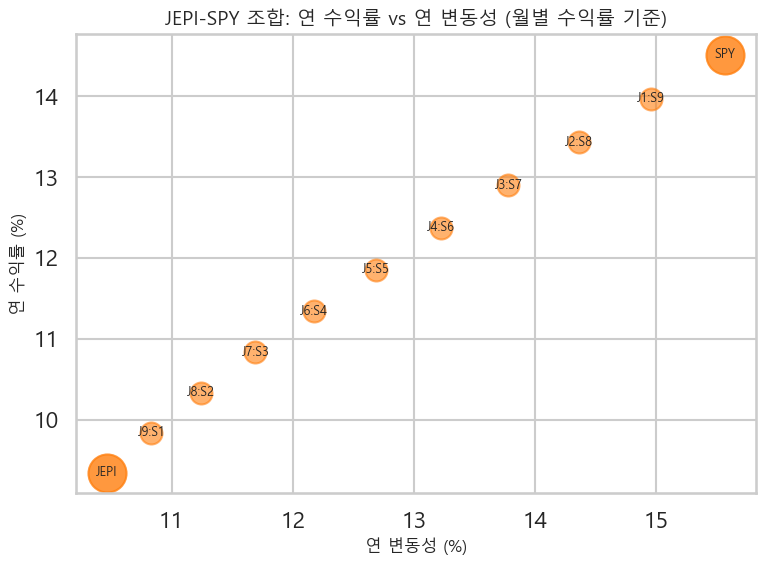

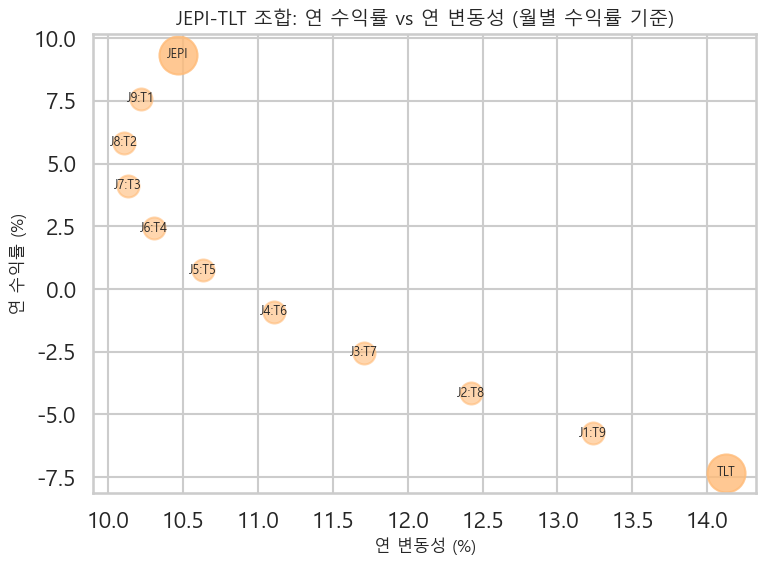

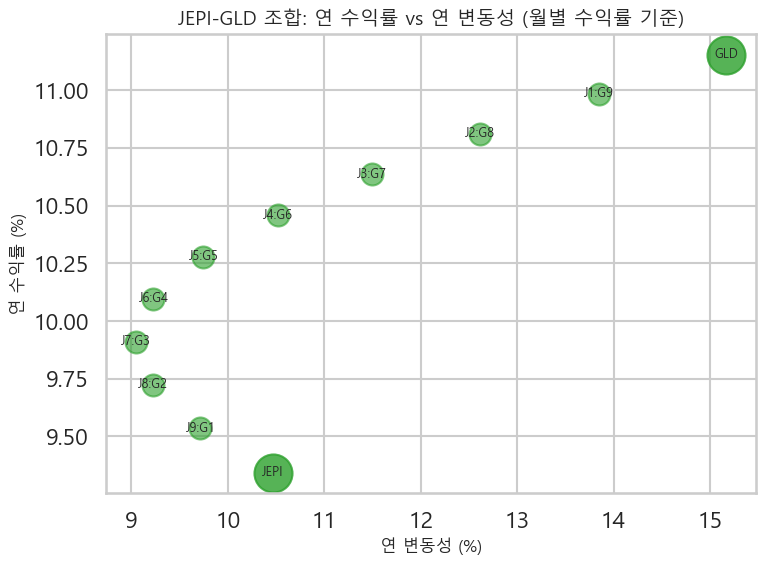

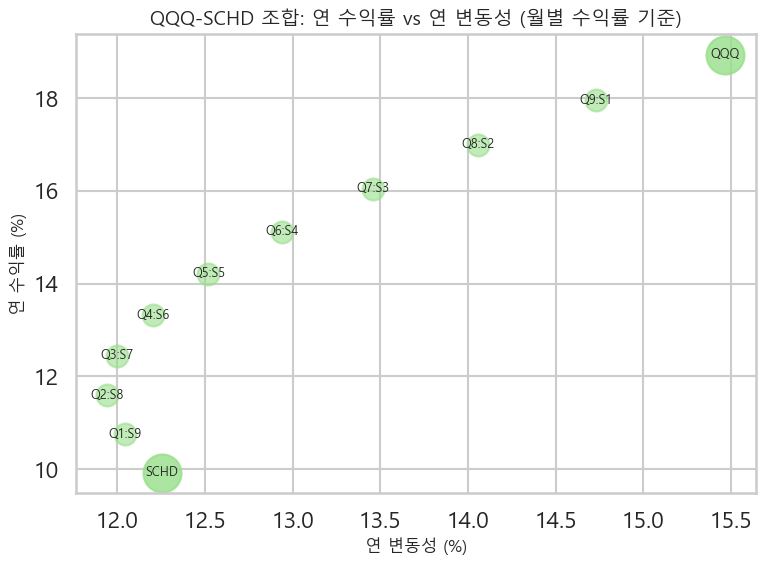

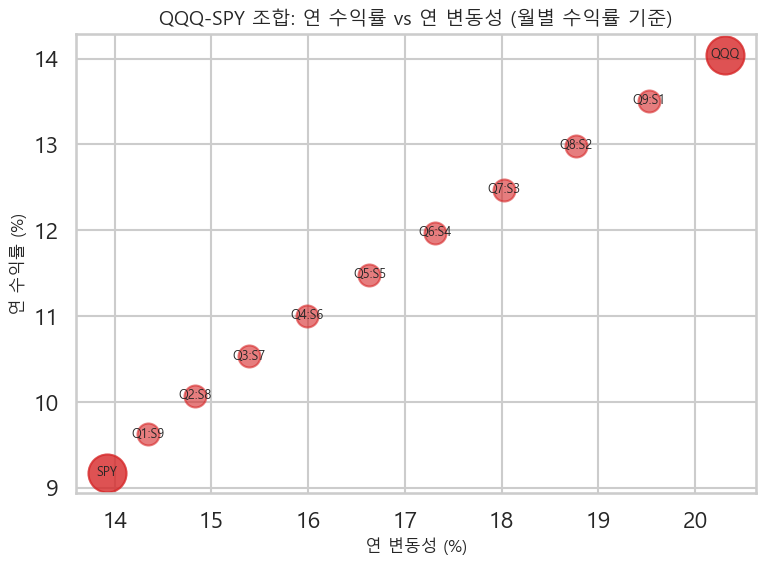

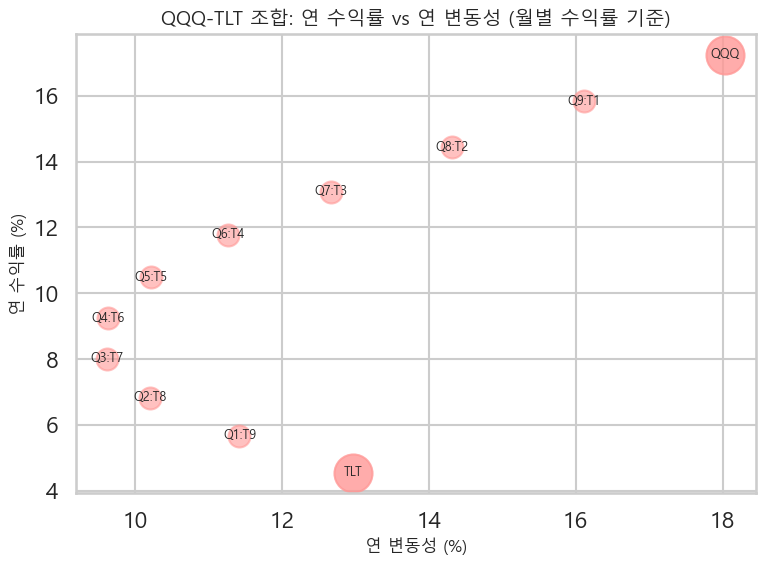

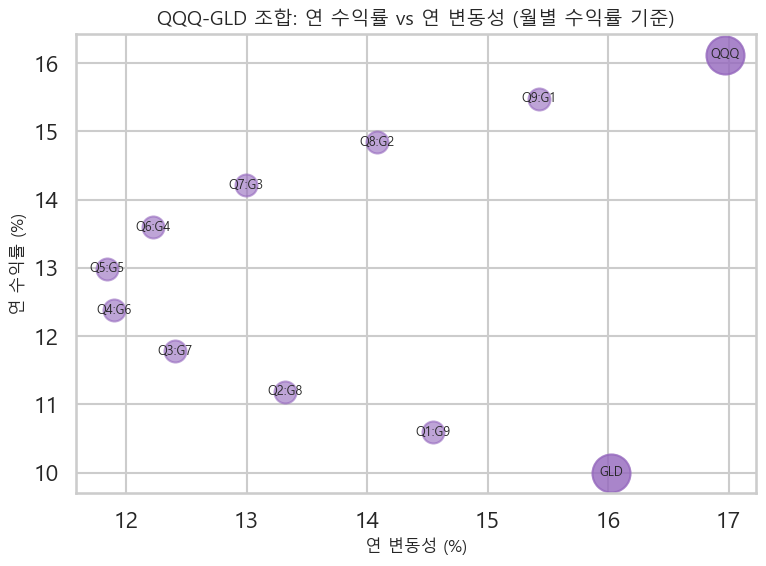

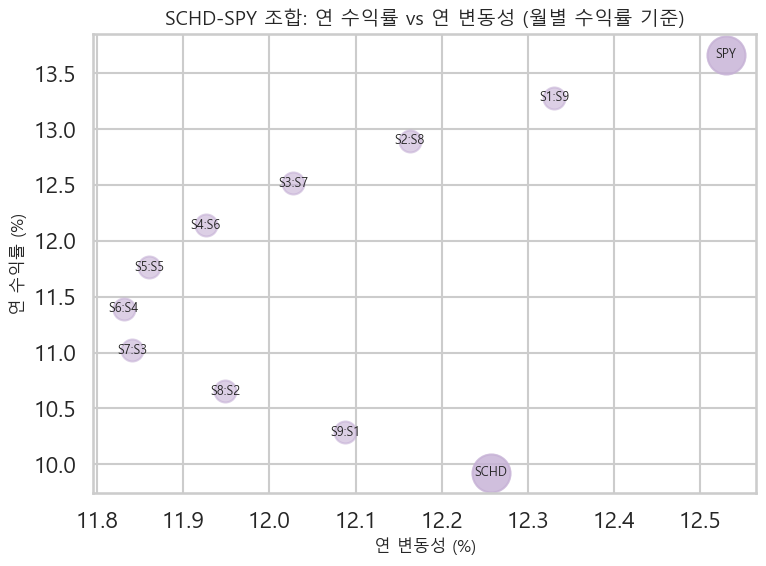

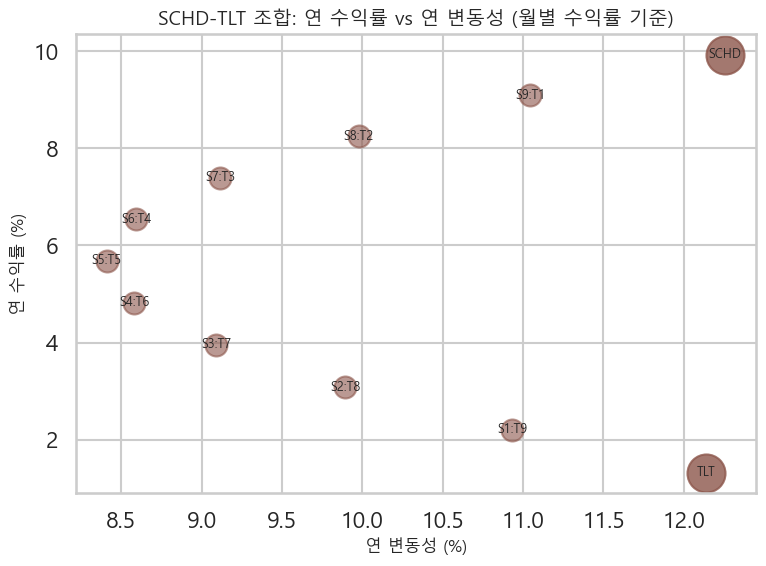

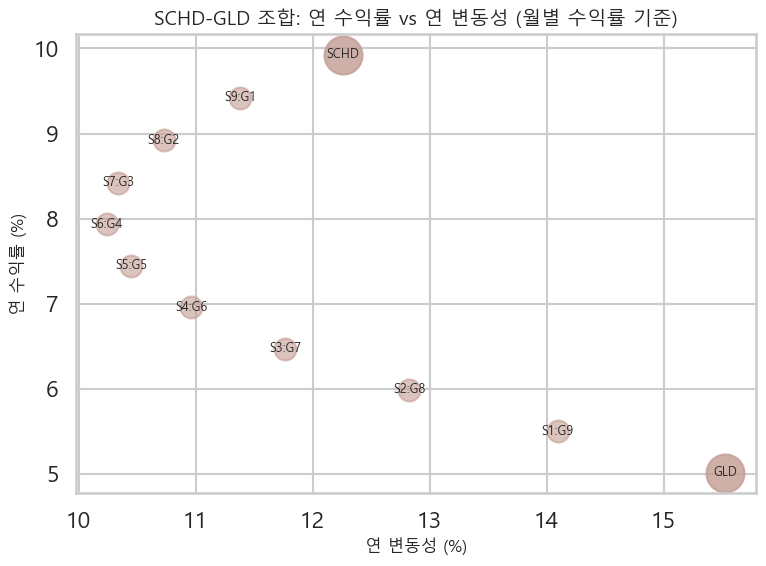

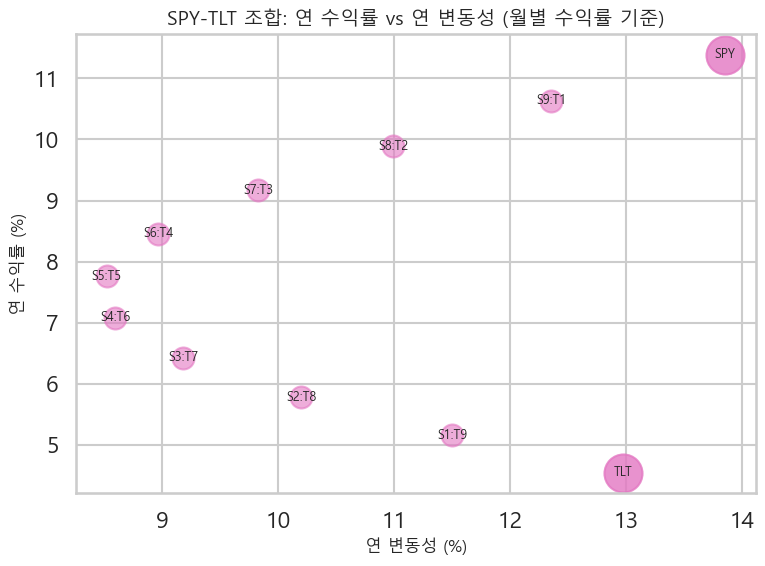

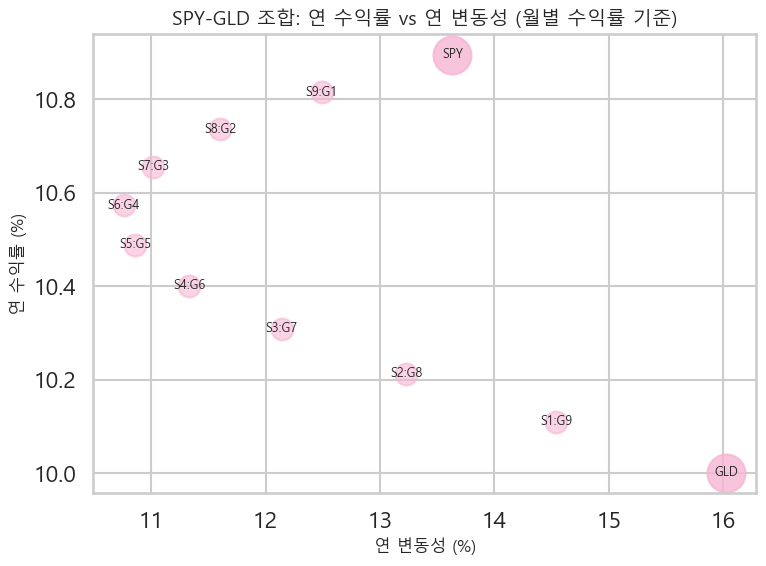

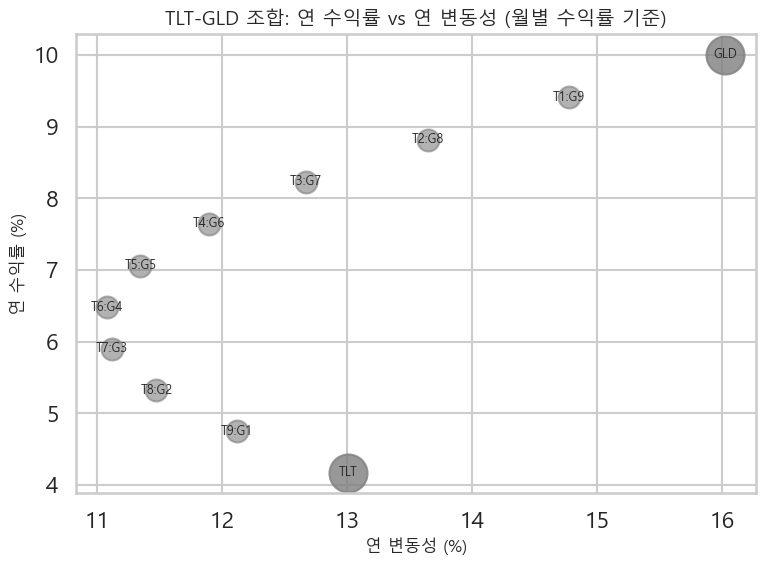

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 예시용 ticker 조합과 수익률 데이터프레임 필요
# tickers = ['JEPI', 'QQQ', 'SCHD', 'SPY', 'TLT', 'GLD']
# two_combinations = list(combinations(tickers, 2))

results = []

for comb in two_combinations:
    t1, t2 = comb
    df = indiv_returns_df[[t1, t2]].dropna()

    for w in range(11):
        w1 = w / 10
        w2 = 1 - w1
    
        w1_int = int(w1 * 10)
        w2_int = 10 - w1_int  # 합이 항상 10이 되도록
    
        label = f"{t1[0]}{w1_int}:{t2[0]}{w2_int}"  # 예: J1:S9
    
        portfolio_return = df[t1] * w1 + df[t2] * w2
    
        annual_return = ((1 + portfolio_return).resample('YE').prod() - 1).mean() * 100
        annual_vol = portfolio_return.resample('YE').std().mean() * np.sqrt(12) * 100
    
        results.append({
            'Combination': f"{t1}-{t2}",
            'Label': label,
            'Return': annual_return,
            'Volatility': annual_vol,
            'Weight1': w1,
            'Weight2': w2,
            'T1': t1,
            'T2': t2,
            'W1_Int': w1_int,
            'W2_Int': w2_int
        })

df_result = pd.DataFrame(results)

unique_combinations = df_result['Combination'].unique()
colors_map = plt.colormaps['tab20']

bubble_size = 250
alpha_default = 0.6
alpha_edge = 0.8

for i, comb in enumerate(unique_combinations):
    df_sub = df_result[df_result['Combination'] == comb]

    plt.figure(figsize=(8, 6))
    color = colors_map(i)

    for _, row in df_sub.iterrows():
        size = bubble_size * 3 if (row['Weight1'] == 0 or row['Weight1'] == 1) else bubble_size
        alpha = alpha_edge if (row['Weight1'] == 0 or row['Weight1'] == 1) else alpha_default
    
        plt.scatter(row['Volatility'], row['Return'], s=size, color=color, alpha=alpha)
    
        if row['Weight1'] == 1 and row['Weight2'] == 0:
            label_text = row['T1']  # 예: SPY
        elif row['Weight1'] == 0 and row['Weight2'] == 1:
            label_text = row['T2']  # 예: GLD
        else:
            label_text = f"{row['T1'][0]}{row['W1_Int']}:{row['T2'][0]}{row['W2_Int']}"  # 예: S3:G7
    
        plt.text(row['Volatility'], row['Return'], label_text,
                 fontsize=9, ha='center', va='center')

    plt.title(f"{comb} 조합: 연 수익률 vs 연 변동성 (월별 수익률 기준)", fontsize=14)
    plt.xlabel("연 변동성 (%)", fontsize=12)
    plt.ylabel("연 수익률 (%)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

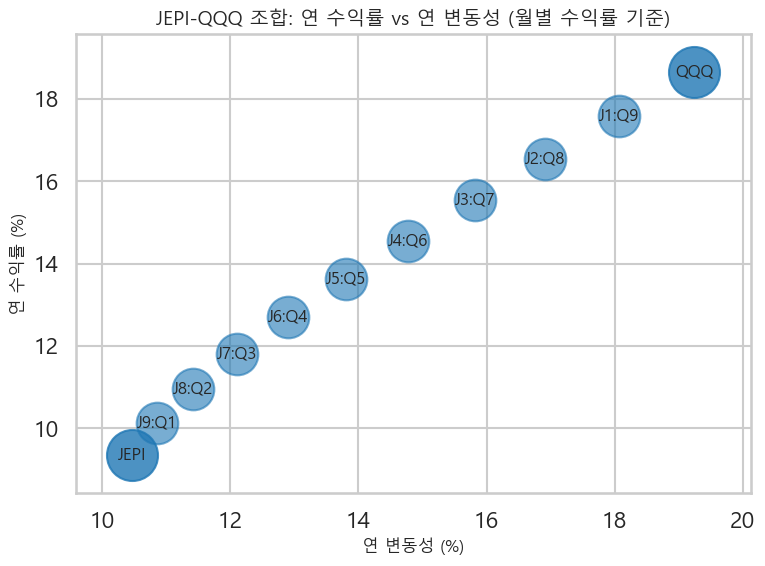

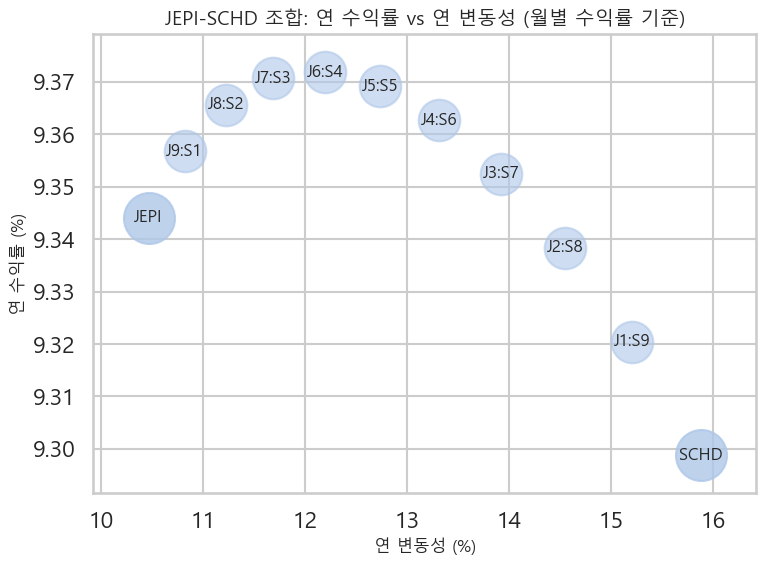

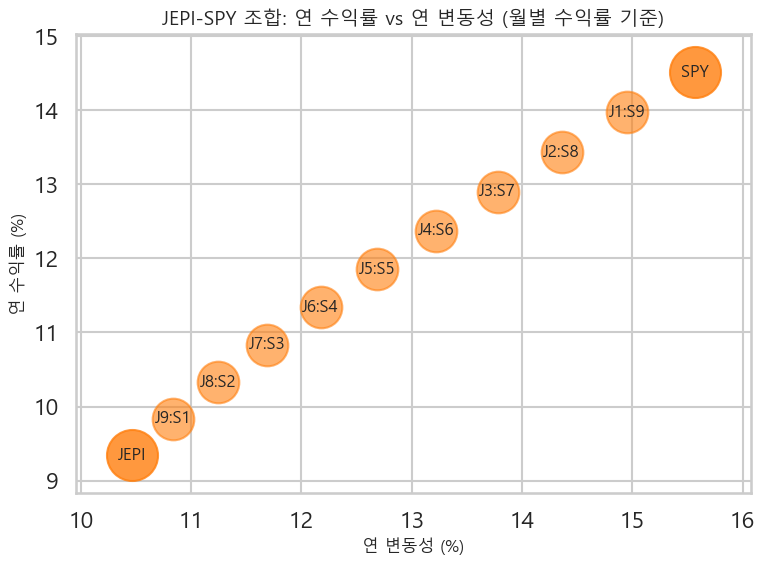

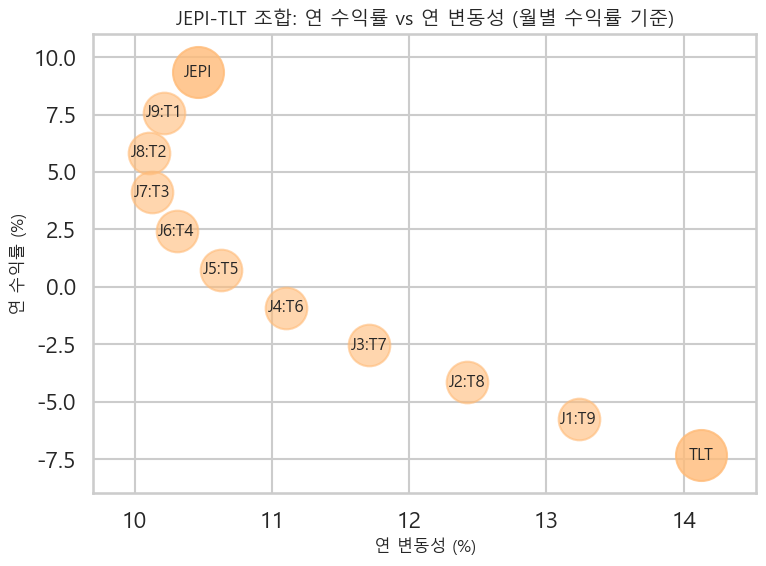

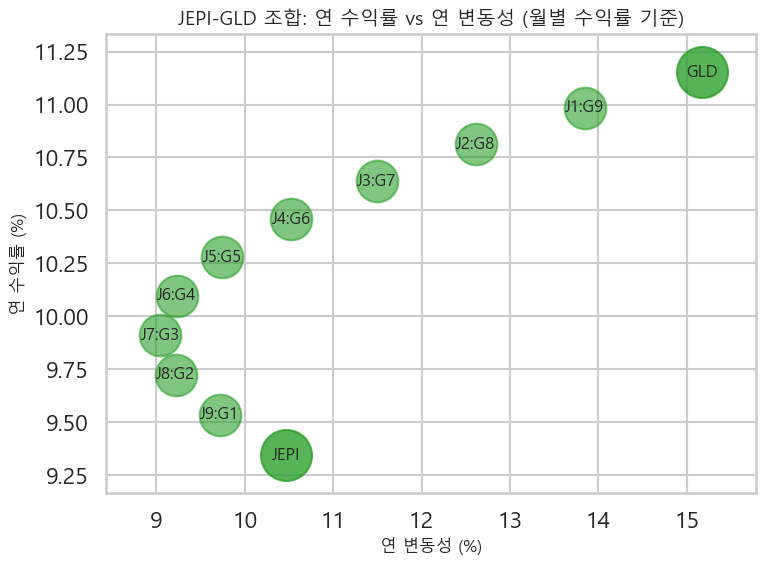

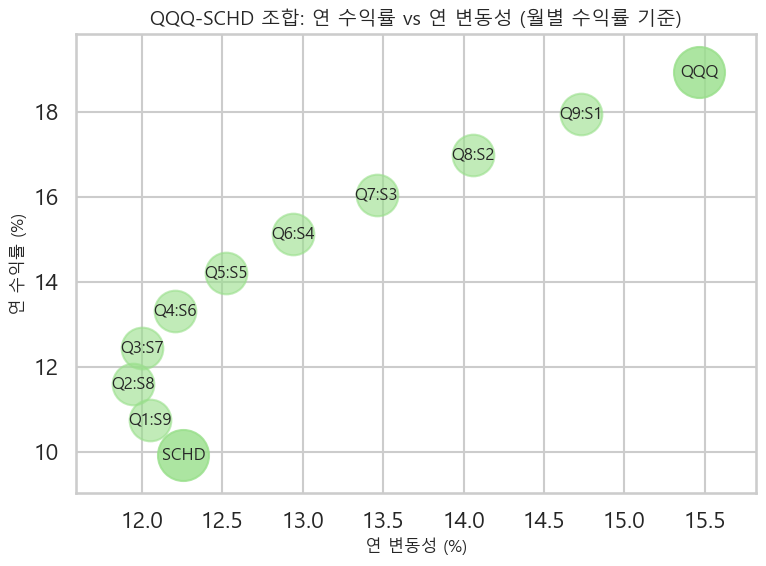

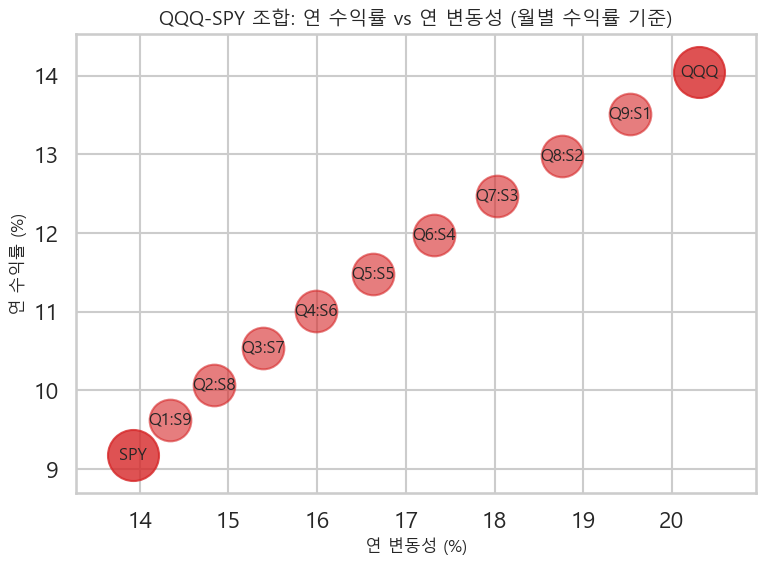

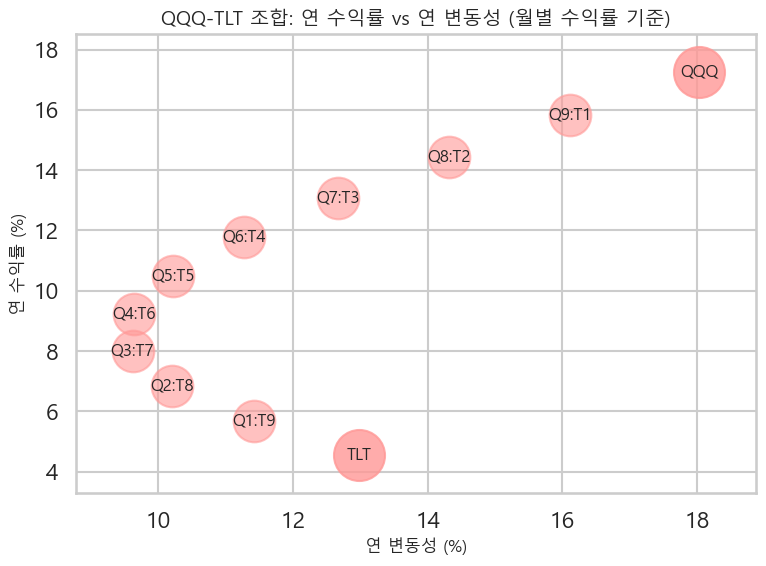

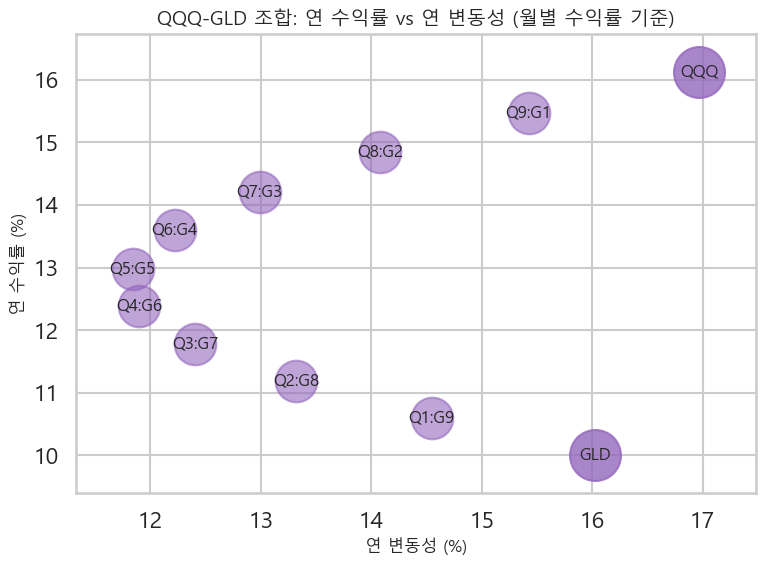

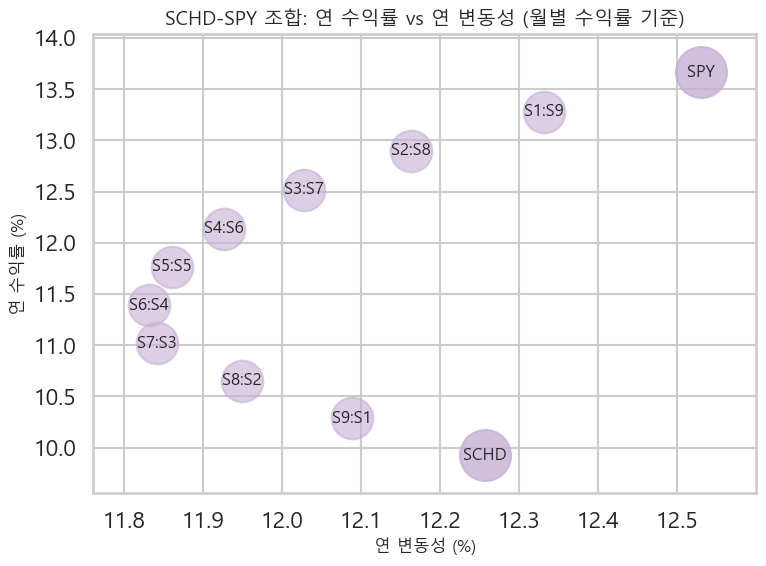

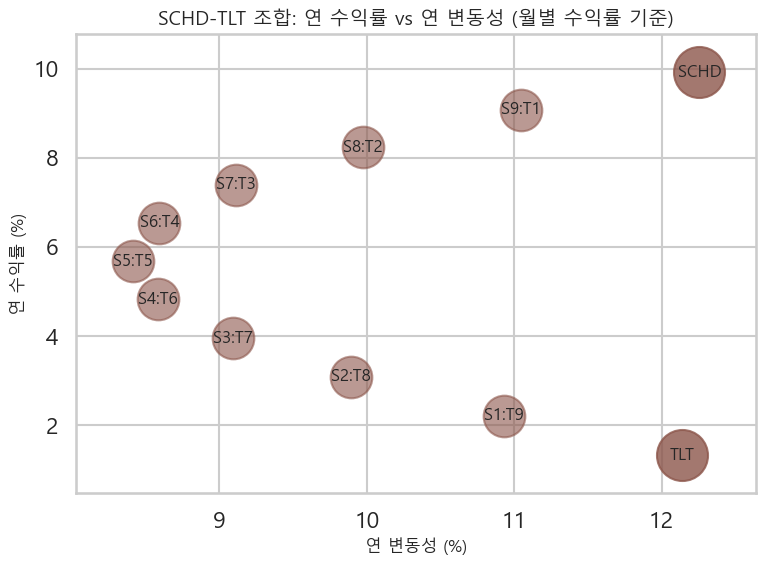

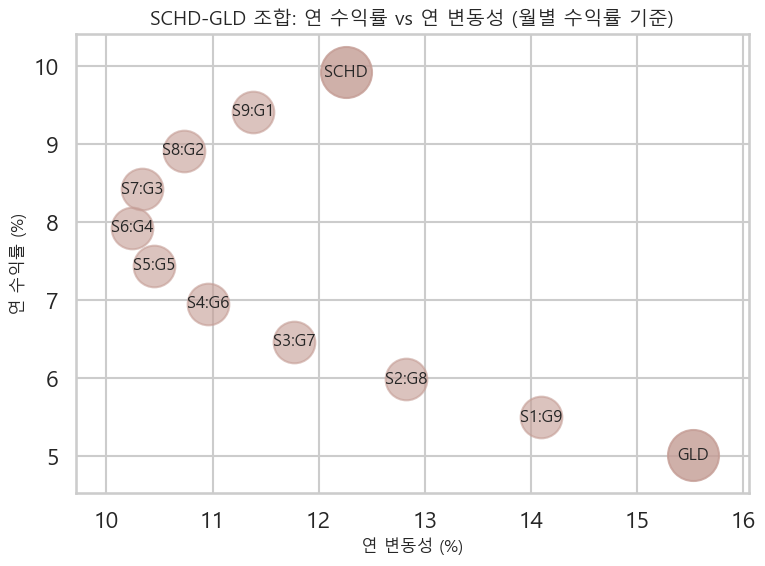

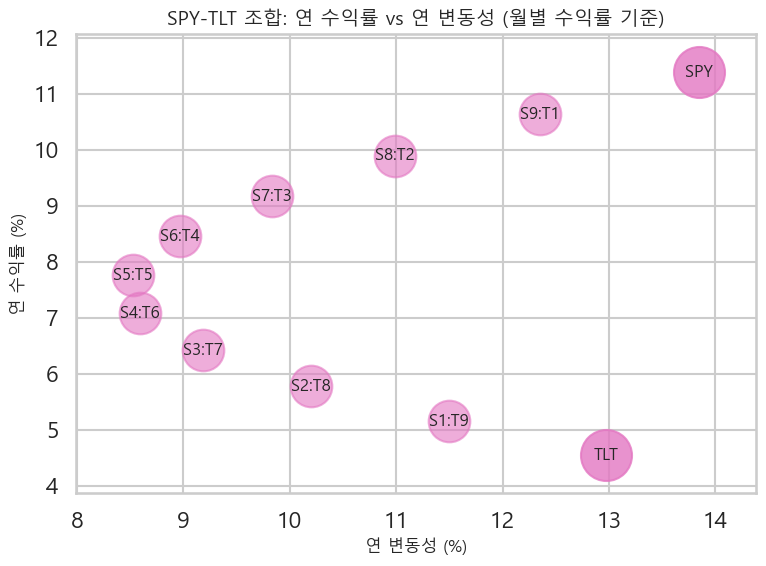

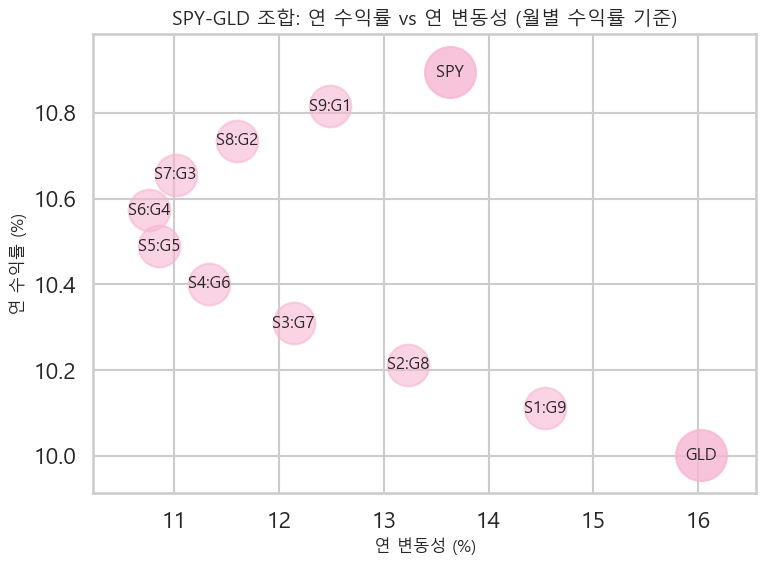

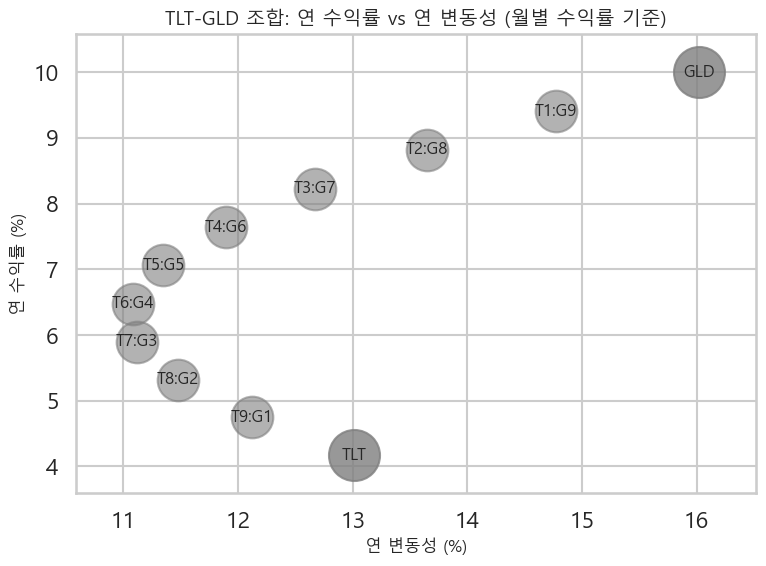

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 예시용 ticker 조합과 수익률 데이터프레임 필요
# tickers = ['JEPI', 'QQQ', 'SCHD', 'SPY', 'TLT', 'GLD']
# two_combinations = list(combinations(tickers, 2))

results = []

for comb in two_combinations:
    t1, t2 = comb
    df = indiv_returns_df[[t1, t2]].dropna()

    for w in range(11):
        w1 = w / 10
        w2 = 1 - w1
    
        w1_int = int(w1 * 10)
        w2_int = 10 - w1_int  # 합이 항상 10이 되도록
    
        label = f"{t1[0]}{w1_int}:{t2[0]}{w2_int}"  # 예: J1:S9
    
        portfolio_return = df[t1] * w1 + df[t2] * w2
    
        annual_return = ((1 + portfolio_return).resample('YE').prod() - 1).mean() * 100
        annual_vol = portfolio_return.resample('YE').std().mean() * np.sqrt(12) * 100
    
        results.append({
            'Combination': f"{t1}-{t2}",
            'Label': label,
            'Return': annual_return,
            'Volatility': annual_vol,
            'Weight1': w1,
            'Weight2': w2,
            'T1': t1,
            'T2': t2,
            'W1_Int': w1_int,
            'W2_Int': w2_int
        })

df_result = pd.DataFrame(results)

unique_combinations = df_result['Combination'].unique()
colors_map = plt.colormaps['tab20']

bubble_size = 450
alpha_default = 0.6
alpha_edge = 0.8

for i, comb in enumerate(unique_combinations):
    df_sub = df_result[df_result['Combination'] == comb]

    plt.figure(figsize=(8, 6))
    color = colors_map(i)

    for _, row in df_sub.iterrows():
        if row['Weight1'] == 0 or row['Weight1'] == 1:
            size = bubble_size * 3
            alpha = alpha_edge
        else:
            size = bubble_size * 2  # 중간 버블 크기
            alpha = alpha_default
    
        plt.scatter(row['Volatility'], row['Return'], s=size, color=color, alpha=alpha)
    
        if row['Weight1'] == 1 and row['Weight2'] == 0:
            label_text = row['T1']
        elif row['Weight1'] == 0 and row['Weight2'] == 1:
            label_text = row['T2']
        else:
            label_text = f"{row['T1'][0]}{row['W1_Int']}:{row['T2'][0]}{row['W2_Int']}"
    
        plt.text(row['Volatility'], row['Return'], label_text,
                 fontsize=12, ha='center', va='center')

    # x, y 축 범위 계산 및 약간 확장
    x_min, x_max = df_sub['Volatility'].min(), df_sub['Volatility'].max()
    y_min, y_max = df_sub['Return'].min(), df_sub['Return'].max()
    
    x_margin = (x_max - x_min) * 0.1  # 10% 여유
    y_margin = (y_max - y_min) * 0.1
    
    plt.xlim(x_min - x_margin, x_max + x_margin)
    plt.ylim(y_min - y_margin, y_max + y_margin)

    plt.title(f"{comb} 조합: 연 수익률 vs 연 변동성 (월별 수익률 기준)", fontsize=14)
    plt.xlabel("연 변동성 (%)", fontsize=12)
    plt.ylabel("연 수익률 (%)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

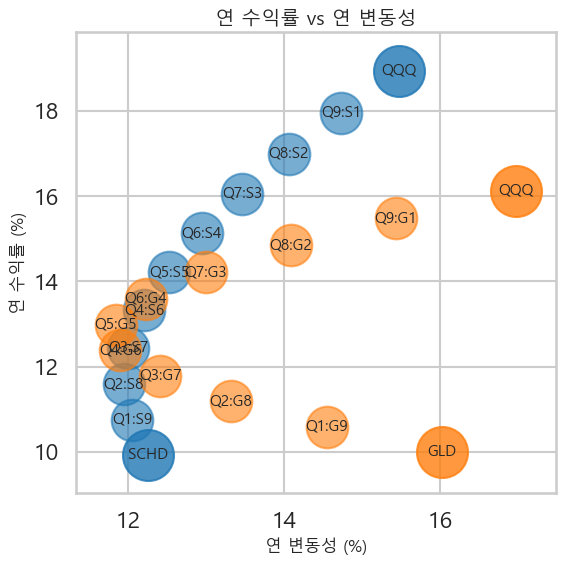

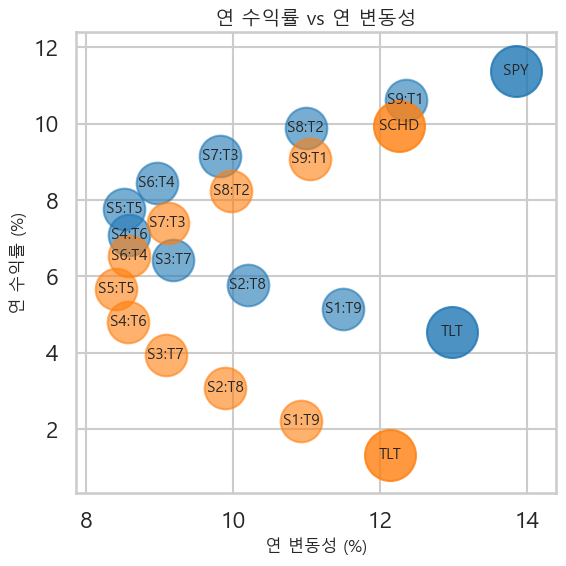

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 필요한 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 결과 저장 리스트
results = []

# 조합 그룹 정의
combo_groups = [
    [('QQQ', 'SCHD'), ('QQQ', 'GLD')],  # 첫 번째 그래프
    [('SPY', 'TLT'), ('SCHD', 'TLT')]   # 두 번째 그래프
]

# 결과 계산
for group in combo_groups:
    for t1, t2 in group:
        df = indiv_returns_df[[t1, t2]].dropna()

        for w in range(11):
            w1 = w / 10
            w2 = 1 - w1

            w1_int = int(w1 * 10)
            w2_int = 10 - w1_int

            label = f"{t1[0]}{w1_int}:{t2[0]}{w2_int}"

            portfolio_return = df[t1] * w1 + df[t2] * w2

            annual_return = ((1 + portfolio_return).resample('YE').prod() - 1).mean() * 100
            annual_vol = portfolio_return.resample('YE').std().mean() * np.sqrt(12) * 100

            results.append({
                'Group': f"{t1}-{t2}",
                'Label': label,
                'Return': annual_return,
                'Volatility': annual_vol,
                'Weight1': w1,
                'Weight2': w2,
                'T1': t1,
                'T2': t2,
                'W1_Int': w1_int,
                'W2_Int': w2_int
            })

# 데이터프레임 변환
df_result = pd.DataFrame(results)

# 시각화
for i, group in enumerate(combo_groups):
    plt.figure(figsize=(6, 6))
    colors_map = plt.colormaps['tab10']
    
    # ✅ 그룹 내 모든 조합의 데이터 결합
    df_group = pd.concat([
        df_result[df_result['Group'] == f"{t1}-{t2}"]
        for t1, t2 in group
    ], ignore_index=True)

    # ✅ 범위 계산 (그룹 전체 기준)
    x_min, x_max = df_group['Volatility'].min(), df_group['Volatility'].max()
    y_min, y_max = df_group['Return'].min(), df_group['Return'].max()
    x_margin = (x_max - x_min) * 0.1
    y_margin = (y_max - y_min) * 0.1

    # ✅ 범위 설정
    plt.xlim(x_min - x_margin, x_max + x_margin)
    plt.ylim(y_min - y_margin, y_max + y_margin)

    # 조합별로 시각화
    for j, (t1, t2) in enumerate(group):
        comb_key = f"{t1}-{t2}"
        df_sub = df_result[df_result['Group'] == comb_key]
        color = colors_map(j)

        for _, row in df_sub.iterrows():
            size = 1350 if row['Weight1'] in [0, 1] else 900
            alpha = 0.8 if row['Weight1'] in [0, 1] else 0.6

            plt.scatter(row['Volatility'], row['Return'], s=size, color=color, alpha=alpha)

            if row['Weight1'] == 1:
                label_text = row['T1']
            elif row['Weight1'] == 0:
                label_text = row['T2']
            else:
                label_text = f"{row['T1'][0]}{row['W1_Int']}:{row['T2'][0]}{row['W2_Int']}"

            plt.text(row['Volatility'], row['Return'], label_text,
                     fontsize=11, ha='center', va='center')

    plt.title(f"연 수익률 vs 연 변동성", fontsize=14)
    plt.xlabel("연 변동성 (%)", fontsize=12)
    plt.ylabel("연 수익률 (%)", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [12]:
import pandas as pd
import numpy as np
from itertools import combinations

# 결과를 저장할 리스트
results = []

# 예시: indiv_returns_df가 월별 수익률을 가진 데이터프레임이라고 가정
# tickers = ['JEPI', 'QQQ', 'SCHD', 'SPY', 'TLT', 'GLD']
# two_combinations = list(combinations(tickers, 2))

for comb in two_combinations:
    t1, t2 = comb
    df = indiv_returns_df[[t1, t2]].dropna()

    # 최소 공통 구간 필터링
    df = df.dropna()

    for w in range(11):
        w1 = w / 10
        w2 = 1 - w1

        # 포트폴리오 수익률 계산
        portfolio_return = df[t1] * w1 + df[t2] * w2

        # 연수익률 및 연변동성 계산
        annual_return = ((1 + portfolio_return).resample('YE').prod() - 1).mean() * 100
        annual_vol = portfolio_return.resample('YE').std().mean() * np.sqrt(12) * 100

        # 결과 저장
        results.append({
            'Combination': f"{t1}-{t2}",
            'Weight1': w1,
            'Weight2': w2,
            'Annual Return (%)': annual_return,
            'Annual Volatility (%)': annual_vol
        })

# 결과를 데이터프레임으로 변환
df_result = pd.DataFrame(results)

# 데이터프레임을 CSV로 저장
df_result.to_csv('portfolio_performance.csv', index=False)

# 결과 데이터프레임 출력 (확인용)
print(df_result)

    Combination  Weight1  Weight2  Annual Return (%)  Annual Volatility (%)
0      JEPI-QQQ      0.0      1.0          18.653225              19.245304
1      JEPI-QQQ      0.1      0.9          17.582856              18.062863
2      JEPI-QQQ      0.2      0.8          16.543654              16.918512
3      JEPI-QQQ      0.3      0.7          15.535554              15.820002
4      JEPI-QQQ      0.4      0.6          14.558491              14.776671
..          ...      ...      ...                ...                    ...
160     TLT-GLD      0.6      0.4           6.479781              11.079622
161     TLT-GLD      0.7      0.3           5.900443              11.119905
162     TLT-GLD      0.8      0.2           5.322962              11.476333
163     TLT-GLD      0.9      0.1           4.747209              12.122758
164     TLT-GLD      1.0      0.0           4.173054              13.008520

[165 rows x 5 columns]


## 박스플롯 비율별
- ex) SCHD, QQQ, S9:Q1, S8:Q2, ...

(('JEPI', 'QQQ'), '0:10') - 데이터 부족으로 시각화 제외
(('JEPI', 'QQQ'), '1:9') - 데이터 부족으로 시각화 제외
(('JEPI', 'QQQ'), '2:8') - 데이터 부족으로 시각화 제외
(('JEPI', 'QQQ'), '3:7') - 데이터 부족으로 시각화 제외
(('JEPI', 'QQQ'), '4:6') - 데이터 부족으로 시각화 제외
(('JEPI', 'QQQ'), '5:5') - 데이터 부족으로 시각화 제외
(('JEPI', 'QQQ'), '6:4') - 데이터 부족으로 시각화 제외
(('JEPI', 'QQQ'), '7:3') - 데이터 부족으로 시각화 제외
(('JEPI', 'QQQ'), '8:2') - 데이터 부족으로 시각화 제외
(('JEPI', 'QQQ'), '9:1') - 데이터 부족으로 시각화 제외
(('JEPI', 'QQQ'), '10:0') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '0:10') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '1:9') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '2:8') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '3:7') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '4:6') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '5:5') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '6:4') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '7:3') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '8:2') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '9:1') - 데이터 부족으로 시각화 제외
(('JEPI', 'SCHD'), '10:0') - 데이터 부족으로 시각화 제외
(('JEPI', 'SPY'), '0:10') - 데이터 부족으로 시각

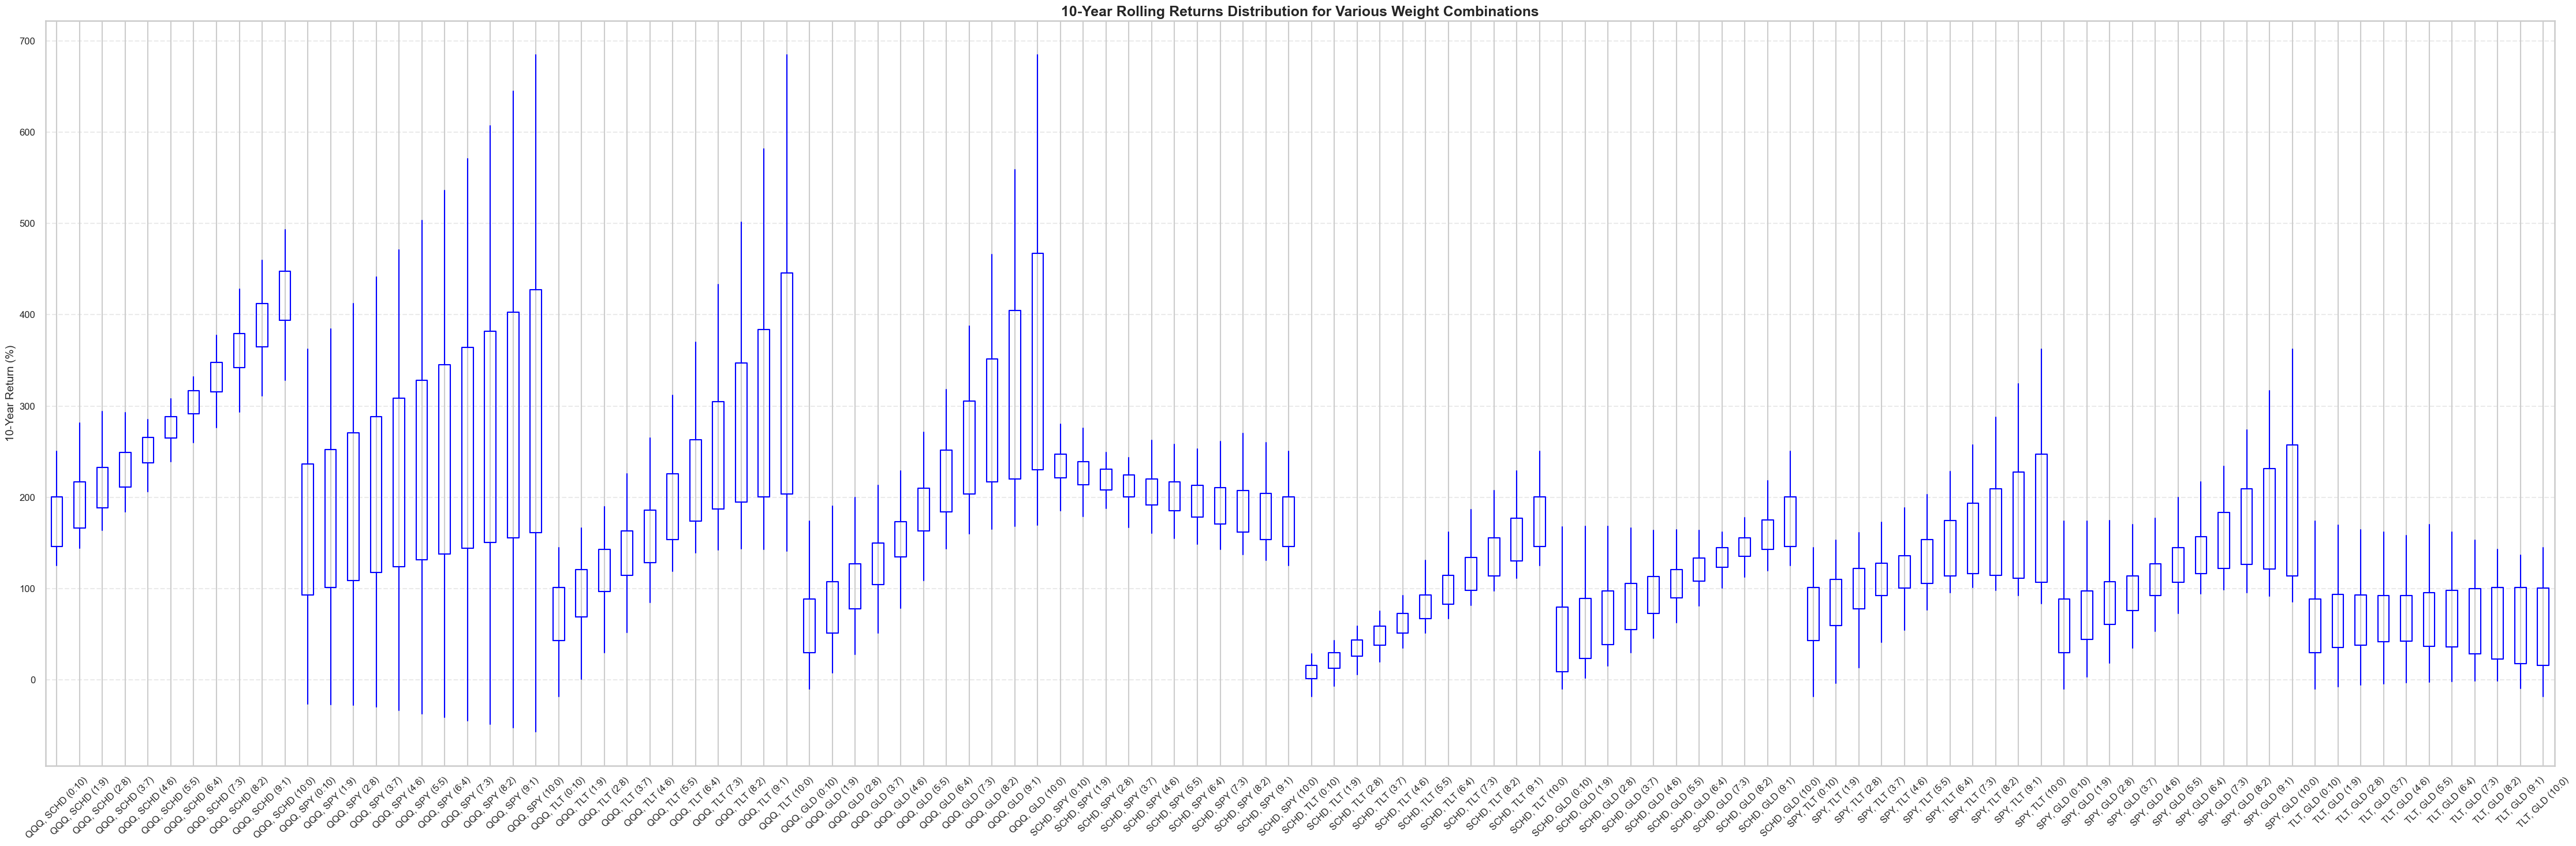

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib as mpl

# 폰트 경로 지정 (Windows에서 Malgun Gothic 폰트 경로)
font_path = 'C:/Windows/Fonts/malgun.ttf'
prop = fm.FontProperties(fname=font_path)

# 폰트 설정
plt.rcParams['font.family'] = prop.get_name()

# Arial 글꼴을 사용하지 않게 설정
plt.rcParams['font.sans-serif'] = ['Malgun Gothic']  # Arial을 대신 사용할 폰트로 Malgun Gothic 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호를 제대로 표시

# seaborn 스타일 설정
sns.set_style('whitegrid')
sns.set_context('talk')

# 조합 목록
two_combinations = list(combinations(tickers, 2))

# --- 1. 두 종목의 조합에 대해 월별 수익률 계산 ---
def calc_combination_returns(df1, df2, weight1=0.5, weight2=0.5):
    """
    두 종목의 월별 수익률을 합쳐서 새로운 포트폴리오의 월별 수익률을 계산
    포트폴리오 수익률은 두 종목의 수익률을 각 종목의 가중치에 따라 합한 것으로 간주
    """
    return (df1 * weight1 + df2 * weight2)

# 각 조합에 대해 월별 수익률 계산 (가중치를 다르게 설정하여 여러 번 계산)
combination_returns = {}
weights = [(i, 10-i) for i in range(11)]  # 0:10부터 10:10까지의 가중치 조합

for combo in two_combinations:
    t1, t2 = combo
    # 월별 수익률 데이터 가져오기
    returns_t1 = monthly_return_dfs[t1]['Monthly Return']
    returns_t2 = monthly_return_dfs[t2]['Monthly Return']
    
    # 각 가중치 조합에 대해 월별 수익률 계산
    for weight1, weight2 in weights:
        weight_key = f"{weight1}:{weight2}"  # 가중치 조합을 키로 사용
        combination_returns[(combo, weight_key)] = calc_combination_returns(returns_t1, returns_t2, weight1/10, weight2/10)

# --- 2. 10년 rolling 수익률 계산 ---
def calc_rolling_returns_with_variable_window(df_returns, default_window=120, min_window=12, min_counts=30):
    """
    df_returns: 종목별 월별 수익률 데이터프레임
    default_window: 기본 10년 (120개월)
    min_window: 최소 window 크기 (1년=12개월)
    min_counts: rolling 결과 최소 개수 (없으면 제외)
    """
    rolling_returns = {}
    for col in df_returns.columns:
        series = df_returns[col].dropna()
        length = len(series)
        window = min(default_window, max(min_window, length))

        rolling_prod = (1 + series).rolling(window=window, min_periods=window).apply(np.prod, raw=True)
        valid_vals = rolling_prod.dropna()
        if len(valid_vals) >= min_counts:
            rolling_returns[col] = (valid_vals - 1) * 100
        else:
            rolling_returns[col] = pd.Series([np.nan])
    return rolling_returns

# 월별 수익률을 하나의 DataFrame에 합쳐서 rolling 수익률 계산
all_combination_returns_df = pd.DataFrame(combination_returns)

# rolling 10년 수익률 계산
rolling_10yr_returns = calc_rolling_returns_with_variable_window(all_combination_returns_df)

# --- 3. 시각화 데이터 준비 ---
labels = []
data = []
for combo_weight, vals in rolling_10yr_returns.items():
    if vals.isna().all():
        print(f"{combo_weight} - 데이터 부족으로 시각화 제외")
        continue
    labels.append(f"{combo_weight[0][0]}, {combo_weight[0][1]} ({combo_weight[1]})")  # 조합 이름과 가중치로 라벨 추가
    data.append(vals.values)

# --- 4. 박스플롯 그리기 ---
plt.figure(figsize=(45, 15))

box = plt.boxplot(data, tick_labels=labels, vert=True, patch_artist=False, showfliers=False)

for b in box['boxes']:
    b.set_color('blue')
    b.set_linewidth(1.5)

for whisker in box['whiskers']:
    whisker.set_color('blue')
    whisker.set_linewidth(1.5)

for cap in box['caps']:
    cap.set_visible(False)

for median in box['medians']:
    median.set_color('white')
    median.set_linewidth(0)

plt.title('10-Year Rolling Returns Distribution for Various Weight Combinations', fontsize=18, weight='bold')
plt.ylabel('10-Year Return (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

In [14]:
# import pandas as pd
# import numpy as np
# from itertools import combinations

# # 결과를 저장할 리스트
# results = []

# # --- 1. 두 종목의 조합에 대해 월별 수익률 계산 ---
# def calc_combination_returns(df1, df2, weight1=0.5, weight2=0.5):
#     """
#     두 종목의 월별 수익률을 합쳐서 새로운 포트폴리오의 월별 수익률을 계산
#     포트폴리오 수익률은 두 종목의 수익률을 각 종목의 가중치에 따라 합한 것으로 간주
#     """
#     return (df1 * weight1 + df2 * weight2)

# # 각 조합에 대해 월별 수익률 계산 (가중치를 다르게 설정하여 여러 번 계산)
# combination_returns = {}
# weights = [(i, 10-i) for i in range(11)]  # 0:10부터 10:10까지의 가중치 조합

# for combo in two_combinations:
#     t1, t2 = combo
#     # 월별 수익률 데이터 가져오기
#     returns_t1 = monthly_return_dfs[t1]['Monthly Return']
#     returns_t2 = monthly_return_dfs[t2]['Monthly Return']
    
#     # 각 가중치 조합에 대해 월별 수익률 계산
#     for weight1, weight2 in weights:
#         weight_key = f"{weight1}:{weight2}"  # 가중치 조합을 키로 사용
#         combination_returns[(combo, weight_key)] = calc_combination_returns(returns_t1, returns_t2, weight1/10, weight2/10)

# # --- 2. 10년 rolling 수익률 계산 ---
# def calc_rolling_returns_with_variable_window(df_returns, default_window=120, min_window=12, min_counts=30):
#     """
#     df_returns: 종목별 월별 수익률 데이터프레임
#     default_window: 기본 10년 (120개월)
#     min_window: 최소 window 크기 (1년=12개월)
#     min_counts: rolling 결과 최소 개수 (없으면 제외)
#     """
#     rolling_returns = {}
#     for col in df_returns.columns:
#         series = df_returns[col].dropna()
#         length = len(series)
#         window = min(default_window, max(min_window, length))

#         rolling_prod = (1 + series).rolling(window=window, min_periods=window).apply(np.prod, raw=True)
#         valid_vals = rolling_prod.dropna()
#         if len(valid_vals) >= min_counts:
#             rolling_returns[col] = (valid_vals - 1) * 100
#         else:
#             rolling_returns[col] = pd.Series([np.nan])
#     return rolling_returns

# # 월별 수익률을 하나의 DataFrame에 합쳐서 rolling 수익률 계산
# all_combination_returns_df = pd.DataFrame(combination_returns)

# # rolling 10년 수익률 계산
# rolling_10yr_returns = calc_rolling_returns_with_variable_window(all_combination_returns_df)

# # --- 3. 10년 수익률을 데이터프레임에 저장 ---
# for combo_weight, vals in rolling_10yr_returns.items():
#     if vals.isna().all():
#         continue  # 데이터가 없으면 건너뛰기

#     combo, weight_key = combo_weight
#     t1, t2 = combo
#     for idx, value in enumerate(vals):
#         results.append({
#             'Combination': f"{t1}-{t2}",
#             'Weight1': weight_key.split(':')[0],
#             'Weight2': weight_key.split(':')[1],
#             '10-Year Return (%)': value
#         })

# # 결과를 데이터프레임으로 변환
# df_result = pd.DataFrame(results)

# # CSV 파일로 저장
# df_result.to_csv('10_year_returns.csv', index=False)

# # 결과 데이터프레임 출력 (확인용)
# print(df_result)

In [15]:
import pandas as pd
import numpy as np
from itertools import combinations

# 결과를 저장할 리스트
results = []

# --- 1. 두 종목의 조합에 대해 월별 수익률 계산 ---
def calc_combination_returns(df1, df2, weight1=0.5, weight2=0.5):
    """
    두 종목의 월별 수익률을 합쳐서 새로운 포트폴리오의 월별 수익률을 계산
    포트폴리오 수익률은 두 종목의 수익률을 각 종목의 가중치에 따라 합한 것으로 간주
    """
    return (df1 * weight1 + df2 * weight2)

# 각 조합에 대해 월별 수익률 계산 (가중치를 다르게 설정하여 여러 번 계산)
combination_returns = {}
weights = [(i, 10-i) for i in range(11)]  # 0:10부터 10:10까지의 가중치 조합

for combo in two_combinations:
    t1, t2 = combo
    # 월별 수익률 데이터 가져오기
    returns_t1 = monthly_return_dfs[t1]['Monthly Return']
    returns_t2 = monthly_return_dfs[t2]['Monthly Return']
    
    # 각 가중치 조합에 대해 월별 수익률 계산
    for weight1, weight2 in weights:
        weight_key = f"{weight1}:{weight2}"  # 가중치 조합을 키로 사용
        combination_returns[(combo, weight_key)] = calc_combination_returns(returns_t1, returns_t2, weight1/10, weight2/10)

# --- 2. 10년 rolling 수익률 계산 ---
def calc_rolling_returns_with_variable_window(df_returns, default_window=120, min_window=12, min_counts=30):
    """
    df_returns: 종목별 월별 수익률 데이터프레임
    default_window: 기본 10년 (120개월)
    min_window: 최소 window 크기 (1년=12개월)
    min_counts: rolling 결과 최소 개수 (없으면 제외)
    """
    rolling_returns = {}
    for col in df_returns.columns:
        series = df_returns[col].dropna()
        length = len(series)
        window = min(default_window, max(min_window, length))

        rolling_prod = (1 + series).rolling(window=window, min_periods=window).apply(np.prod, raw=True)
        valid_vals = rolling_prod.dropna()
        if len(valid_vals) >= min_counts:
            rolling_returns[col] = (valid_vals - 1) * 100
        else:
            rolling_returns[col] = pd.Series([np.nan])
    return rolling_returns

# 월별 수익률을 하나의 DataFrame에 합쳐서 rolling 수익률 계산
all_combination_returns_df = pd.DataFrame(combination_returns)

# rolling 10년 수익률 계산
rolling_10yr_returns = calc_rolling_returns_with_variable_window(all_combination_returns_df)

# --- 3. 박스플롯 기준 값들 (최소값, 1사분위수, 중앙값, 3사분위수, IQR, 최대값)과 분산 계산 ---
for combo_weight, vals in rolling_10yr_returns.items():
    if vals.isna().all():
        continue  # 데이터가 없으면 건너뛰기

    combo, weight_key = combo_weight
    t1, t2 = combo
    
    # 박스플롯 기준 값들 계산
    min_val = vals.min()
    q1 = vals.quantile(0.25)
    median = vals.median()
    q3 = vals.quantile(0.75)
    iqr = q3 - q1
    max_val = vals.max()
    
    # 분산 계산
    variance = vals.var()

    # 결과 리스트에 추가
    results.append({
        'Combination': f"{t1}-{t2}",
        'Weight1': weight_key.split(':')[0],
        'Weight2': weight_key.split(':')[1],
        'Min Value': min_val,
        '1st Quartile': q1,
        'Median': median,
        '3rd Quartile': q3,
        'IQR': iqr,
        'Max Value': max_val,
        'Variance': variance
    })

# 결과를 데이터프레임으로 변환
df_result = pd.DataFrame(results)

# CSV 파일로 저장
df_result.to_csv('10_year_returns_summary.csv', index=False)

# 결과 데이터프레임 출력 (확인용)
print(df_result)

    Combination Weight1 Weight2   Min Value  1st Quartile      Median  \
0      QQQ-SCHD       0      10  125.465015    146.302435  157.794501   
1      QQQ-SCHD       1       9  143.939236    166.602280  178.790578   
2      QQQ-SCHD       2       8  163.518146    188.342107  200.809042   
3      QQQ-SCHD       3       7  184.229372    211.406178  225.874710   
4      QQQ-SCHD       4       6  206.097607    237.577970  251.896808   
..          ...     ...     ...         ...           ...         ...   
105     TLT-GLD       6       4   -1.880017     35.810806   67.835159   
106     TLT-GLD       7       3   -1.462041     28.209151   72.422320   
107     TLT-GLD       8       2   -1.272507     22.732595   76.405104   
108     TLT-GLD       9       1   -9.334147     17.929925   82.765059   
109     TLT-GLD      10       0  -18.361289     15.778866   83.368600   

     3rd Quartile        IQR   Max Value     Variance  
0      200.263998  53.961563  250.303295  1233.820818  
1      216.

In [16]:
import pandas as pd

# 'portfolio_performance.csv' 파일 불러오기
portfolio_performance_df = pd.read_csv('portfolio_performance.csv')

# 'Combination' 컬럼에서 'JEPI-'가 포함된 행을 제외
filtered_df = portfolio_performance_df[~portfolio_performance_df['Combination'].str.contains('JEPI-', na=False)]

# 필터링된 데이터프레임을 새로운 CSV 파일로 저장
filtered_df.to_csv('filtered_portfolio_performance.csv', index=False)

# 필터링된 데이터프레임 출력 (확인용)
print(filtered_df)

    Combination  Weight1  Weight2  Annual Return (%)  Annual Volatility (%)
55     QQQ-SCHD      0.0      1.0           9.926673              12.256566
56     QQQ-SCHD      0.1      0.9          10.750008              12.046986
57     QQQ-SCHD      0.2      0.8          11.590184              11.940759
58     QQQ-SCHD      0.3      0.7          12.447368              12.000316
59     QQQ-SCHD      0.4      0.6          13.321728              12.204962
..          ...      ...      ...                ...                    ...
160     TLT-GLD      0.6      0.4           6.479781              11.079622
161     TLT-GLD      0.7      0.3           5.900443              11.119905
162     TLT-GLD      0.8      0.2           5.322962              11.476333
163     TLT-GLD      0.9      0.1           4.747209              12.122758
164     TLT-GLD      1.0      0.0           4.173054              13.008520

[110 rows x 5 columns]


In [17]:
import pandas as pd

# 파일 불러오기
file1 = pd.read_csv('filtered_portfolio_performance.csv')

# 'Weight1'을 0부터 10까지의 숫자로 변환
file1['Weight1'] = (file1['Weight1'] * 10).round().astype(int)

# 'Weight2'를 10에서 'Weight1'을 뺀 값으로 설정
file1['Weight2'] = 10 - file1['Weight1']

# 변환된 데이터프레임 확인
print(file1)

# 변경된 데이터를 새로운 CSV 파일로 저장
file1.to_csv('updated_portfolio_performance.csv', index=False)

    Combination  Weight1  Weight2  Annual Return (%)  Annual Volatility (%)
0      QQQ-SCHD        0       10           9.926673              12.256566
1      QQQ-SCHD        1        9          10.750008              12.046986
2      QQQ-SCHD        2        8          11.590184              11.940759
3      QQQ-SCHD        3        7          12.447368              12.000316
4      QQQ-SCHD        4        6          13.321728              12.204962
..          ...      ...      ...                ...                    ...
105     TLT-GLD        6        4           6.479781              11.079622
106     TLT-GLD        7        3           5.900443              11.119905
107     TLT-GLD        8        2           5.322962              11.476333
108     TLT-GLD        9        1           4.747209              12.122758
109     TLT-GLD       10        0           4.173054              13.008520

[110 rows x 5 columns]


In [18]:
# import pandas as pd

# # 파일 1: updated_portfolio_performance.csv 읽기
# file_1_path = 'updated_portfolio_performance.csv'
# df1 = pd.read_csv(file_1_path)

# # 파일 2: 10_year_returns_summary.csv 읽기
# file_2_path = '10_year_returns_summary.csv'
# df2 = pd.read_csv(file_2_path)

# # 두 데이터프레임을 "Combination", "Weight1", "Weight2" 기준으로 병합 (inner join)
# merged_df = pd.merge(df1, df2, on=['Combination', 'Weight1', 'Weight2'], how='inner')

# # 결과를 새로운 CSV 파일로 저장
# output_file_path = 'merged_portfolio_summary.csv'
# merged_df.to_csv(output_file_path, index=False)

# # 결과 출력
# print(f"파일 병합 완료: {output_file_path}")

In [19]:
import pandas as pd

# 파일 1: updated_portfolio_performance.csv 읽기
file_1_path = 'updated_portfolio_performance.csv'
df1 = pd.read_csv(file_1_path)

# 파일 2: 10_year_returns_summary.csv 읽기
file_2_path = '10_year_returns_summary.csv'
df2 = pd.read_csv(file_2_path)

# 두 데이터프레임을 "Combination", "Weight1", "Weight2" 기준으로 병합 (inner join)
merged_df = pd.merge(df1, df2, on=['Combination', 'Weight1', 'Weight2'], how='inner')

# 컬럼 이름 변경
merged_df.rename(columns={
    'Annual Return (%)': 'Annual Return',
    'Annual Volatility (%)': 'Annual Volatility'
}, inplace=True)

# 결과를 새로운 CSV 파일로 저장
output_file_path = 'merged_portfolio_summary.csv'
merged_df.to_csv(output_file_path, index=False)

# 결과 출력
print(f"파일 병합 완료: {output_file_path}")

파일 병합 완료: merged_portfolio_summary.csv


In [20]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('merged_portfolio_summary.csv')

# Return-to-Volatility Ratio 계산
df['Return-to-Volatility Ratio'] = df['Annual Return'] / df['Annual Volatility']

# 결과 확인
print(df[['Combination', 'Annual Return', 'Annual Volatility', 'Return-to-Volatility Ratio']])

# 새로운 CSV 파일로 저장
df.to_csv('merged_portfolio_summary_with_ratio.csv', index=False)

    Combination  Annual Return  Annual Volatility  Return-to-Volatility Ratio
0      QQQ-SCHD       9.926673          12.256566                    0.809907
1      QQQ-SCHD      10.750008          12.046986                    0.892340
2      QQQ-SCHD      11.590184          11.940759                    0.970640
3      QQQ-SCHD      12.447368          12.000316                    1.037253
4      QQQ-SCHD      13.321728          12.204962                    1.091501
..          ...            ...                ...                         ...
105     TLT-GLD       6.479781          11.079622                    0.584838
106     TLT-GLD       5.900443          11.119905                    0.530620
107     TLT-GLD       5.322962          11.476333                    0.463821
108     TLT-GLD       4.747209          12.122758                    0.391595
109     TLT-GLD       4.173054          13.008520                    0.320794

[110 rows x 4 columns]


In [21]:
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('merged_portfolio_summary_with_ratio.csv')

# Range 계산 (Max Value - Min Value)
df['Range'] = df['Max Value'] - df['Min Value']

# Range-to-Variance Ratio 계산 (Range / Variance)
df['Range-to-Variance Ratio'] = df['Range'] / df['Variance']

# 결과 확인
print(df[['Combination', 'Min Value', 'Max Value', 'Variance', 'Range', 'Range-to-Variance Ratio']])

# 새로운 CSV 파일로 저장
df.to_csv('merged_portfolio_summary_with_range.csv', index=False)

    Combination   Min Value   Max Value     Variance       Range  \
0      QQQ-SCHD  125.465015  250.303295  1233.820818  124.838280   
1      QQQ-SCHD  143.939236  281.479338  1296.787363  137.540102   
2      QQQ-SCHD  163.518146  315.003139  1390.563314  151.484994   
3      QQQ-SCHD  184.229372  351.010673  1527.996050  166.781301   
4      QQQ-SCHD  206.097607  389.642133  1725.091888  183.544526   
..          ...         ...         ...          ...         ...   
105     TLT-GLD   -1.880017  162.171061  1498.670760  164.051078   
106     TLT-GLD   -1.462041  153.057571  1554.516651  154.519612   
107     TLT-GLD   -1.272507  143.072256  1652.750523  144.344763   
108     TLT-GLD   -9.334147  136.446148  1789.306471  145.780295   
109     TLT-GLD  -18.361289  144.856837  1960.216252  163.218126   

     Range-to-Variance Ratio  
0                   0.101180  
1                   0.106062  
2                   0.108938  
3                   0.109150  
4                   0.106397